# Table of Contents

[0. Context](#context)<br>

[1. Import the Dataset and Explore the Data](#import-the-dataset-and-explore-the-data)<br>
Check data contents, provide descriptive statistics, and check for incoherencies in the data.<br>
Explore data visually and extract relevant insights.<br>
Explain your rationale and findings.<br>
Do not forget to analyze multivariate relationships.<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.1 Importing Libraries](#11-importing-libraries)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.2 Loading and Reading the Dataset](#12-loading-and-reading-the-dataset)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.3 Descriptive Statistics](#13-descriptive-statistics)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.4 Incoherencies](#14-incoherencies)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.5 Exploring Data Visually](#15-exploring-data-visually)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.6 Pair-wise Relationships](#16-pair-wise-relationships)<br>

[2. Clean and Pre-process the Data](#clean-and-pre-process-the-data)<br>
Are there any missing values? Take action to handle them.<br>
Check the dataset for outliers and pre-process them. Justify your decisions.<br>
Deal with categorical variables.<br>
Review current features and create extra features if needed. Explain your steps.<br>
Perform data scaling. Explain the reasoning behind your choices.<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.1 Missing Values](#21-missing-values)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.2 Duplicates](#22-duplicates)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.3 Outliers](#23-outliers)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.4 Categorical Data](#24-categorical-data)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.5 Aggregations](#25-aggregations)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.6 Feature Engineering](#26-feature-engineering)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.7 Multivariate Relationships](#27-multivariate-relationships)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.8 Data Scaling](#28-data-scaling)<br>

[3. Feature Selection](#feature-selection)<br>
Define and implement an unambiguous strategy for feature selection.<br>
Use methods discussed in the course.<br>
Present and justify your final selection.<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.1 Filter Methods](#31-filter-methods)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1.1 Univariate Variables](#311-univariate-variables)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1.2 Correlation Indices](#312-correlation-indices)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1.3 Chi-Square](#313-chi-square)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.2 Wrapper Methods](#32-wrapper-methods)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.
e than 0.6.  
[2
ith a macro F1-score of more than 0.6.  


# 0. Context <a name="0-context"></a>

The New York Workers’ Compensation Board (WCB) administers and regulates workers’ compensation, disability, and other workers’ benefits. <br>
**WCB is responsible for assembling and deciding on claims whenever it becomes aware of a workplace injury**. Since 2000, the WCB has assembled and reviewed more than 5 million claims. However, manually reviewing all claims is an arduous and time-consuming process. For that reason, the WCB has reached out to Nova IMS to assist them in the creation of a model that can automate the decision-making whenever a new claim is received. <br>

Our task is to create a classification model that can accurately predict the WCB’s final decision on what type of injury (Claim Injury Type) should be given to a claim. To do that, the WCB has provided labelled data with all claims assembled between
2020 and 02222 <r>. 

# Import the Dataset and Explore the Data <a name="import-the-dataset-and-explore-the-data"></a>


## 1.1 Importing Libraries <a name="11-importing-libraries"></a>


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import inspect
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
#from kmodes.kmodes import KModes
from math import ceil

from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# embedded methods
from sklearn.linear_model import LassoCV

import warnings
warnings.filterwarnings('ignore')

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Seeting seaborn style
sns.set()

## 1.2 Loading and Reading the Dataset <a name="12-loading-and-reading-the-dataset"></a>


In [8]:
train_data = pd.read_csv('train_data.csv', sep = ',', low_memory=False)   #sep is good to seperate data
pd.set_option('display.max_columns', None) #to be able too see all columns
train_data.head(5)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,5393875,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,5393091,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5393889,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,957648180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,5393887,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [9]:
X_test = pd.read_csv('test_data.csv', sep = ',', low_memory=False)
pd.set_option('display.max_columns', None)

### Metadata

**Claim Dates**  
`Accident Date` Injury date of the claim.  
`Assembly Date` The date the claim was first assembled.  
`C-2 Date` Date of receipt of the Employer's Report of Work-Related Injury/Illness or equivalent (formerly Form C-2).  
`C-3 Date` Date Form C-3 (Employee Claim Form) was received.  
`First Hearing Date` Date the first hearing was held on a claiWCBhearing location. A blank date means the claim has not yet had a hearing held.  

**Worker Demographics**  
`Age at Injury` Age of injured worker when the injury occurred.  
`Birth Year` The reported year of birth of the injured worker.  
`Gender` The reported gender of the injured worker.  
`Zip Code` The reported ZIP code of the injured worker’s home address.  

**Claim and Case Information**  
`Alternative Dispute Resolution` Adjudication processes external to the Board.  
`Attorney/Representative` Is the claim being represented by an Attorney?  
`Claim Identifier` Unique identifier for each claim, assigned by train_data.  
`Carrier Name` Name of primary insurance provider responsible for providing workers’ compensation coverage to the injured worker’s employer.  
`Carrier Type` Type of primary insurance provider responsible for providing workers’ compensation coverage.  
`Average Weekly Wage` The wage used to calculate workers’ compensation, disability, or paid leave wage replacement benefits.  

**Location and Region**  
`County of Injury` Name of the New York County where the injury occurred.  
`DiWCBe` Name of the train_data district office that oversees claims for that region or area of the state.  
`Medical Fee Region` Approximate region where the injured worker would receive medical service.  

**Incident and Injury Details**  
`COVID-19 Indicator` Indication that the claim may be associated with COVID-19.  
`IME-4 Count` Number of IME-4 forms received per claim. The IME-4 form is the “Independent Examiner's Report of Independent Medical Examination” form.  

**Industry Classification**  
`Industry Code` NAICS code and descriptions are available at https://www.naics.com/search-naics-codes-by-industry/.  
`Industry Code Description` 2-digit NAICS industry code description used to classify businesses according to their economic activity.  

**Injury Descriptions and Codes**  
`OIICS Nature of Injury Description` The OIICS nature of injury codes & descriptions are available at https://www.bls.gov/iif/oiics_manual_2007.pdf.  
`WCIO Cause of Injury Code` The WCIO cause of injury codes & descriptions are available at https://www.wcio.org/Active%20PNC/WCIO_Cause_Table.pdf.  
`WCIO Cause of Injury Description` See description of field above.  
`WCIO Nature of Injury Code` The WCIO nature of injury codes are available at https://www.wcio.org/Active%20PNC/WCIO_Nature_Table.pdf.  
`WCIO Nature of Injury Description` See description of field above.  
`WCIO Part Of Body Code` The WCIO part of body codes & descriptions are available at https://www.wcio.org/Active%20PNC/WCIO_Part_Table.pdf.  
`WCIO Part Of Body Description` See description of field above.  

**Claim Outcomes**  
`Agreement Reached` Binary variable: Yes if theagr, eement without the involvement of<br> thnkn Decision` own at the start of a claim.  
`traiWCBMulticlass variable: Decision of the train_data relative to the claim; "Accident" indicates a means illness from the workplace ->e" indicaWCBthe workplace, both of which require train_atdelibera<br>tion and Injury Type` Main be unknown at the cla`im's start.  
WCB target variable: Deliberation o the claimin_data relative to benefits awarded toity. aim, with numbering indicating severity. <br>  


## 1.3 Descriptive Statistics <a name="13-descriptive-statistics"></a>


#### Shape

In [13]:
train_data.shape

(593471, 33)

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

### Any footnotes?

In [16]:
train_data.tail(5)
# No, there isn't any

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
593466,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327160035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593467,2022-12-13,72.0,N,2022-12-31,N,0.0,1950.0,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,1A. PRIVATE,6165075,2. NON-COMP,SULLIVAN,N,BINGHAMTON,NaN,F,NaN,48.0,TRANSPORTATION AND WAREHOUSING,I,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,0.0,Not Work Related,3.0
593468,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249875936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593469,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120584215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593470,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,818961390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
train_data.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,574026.0,4.211427e+01,1.425643e+01,0.0,31.0,42.0,54.0,117.0
Average Weekly Wage,545375.0,4.910883e+02,6.092918e+03,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544948.0,1.886768e+03,4.146444e+02,0.0,1965.0,1977.0,1989.0,2018.0
Claim Identifier,593471.0,2.366760e+07,1.079271e+08,5393066.0,5593414.5,5791212.0,5991000.5,999891667.0
IME-4 Count,132803.0,3.207337e+00,2.832303e+00,1.0,1.0,2.0,4.0,73.0
Industry Code,564068.0,5.864531e+01,1.964417e+01,11.0,45.0,61.0,71.0,92.0
OIICS Nature of Injury Description,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WCIO Cause of Injury Code,558386.0,5.438114e+01,2.587428e+01,1.0,31.0,56.0,75.0,99.0
WCIO Nature of Injury Code,558369.0,4.101384e+01,2.220752e+01,1.0,16.0,49.0,52.0,91.0
WCIO Part Of Body Code,556944.0,3.973815e+01,2.236594e+01,-9.0,33.0,38.0,53.0,99.0


In [18]:
train_data.describe(include='object').T

,count,unique,top,freq
Accident Date,570337,5539,2020-03-01,1245
Alternative Dispute Resolution,574026,3,N,571412
Assembly Date,593471,1096,2020-03-06,1422
Attorney/Representative,574026,2,N,392291
C-2 Date,559466,2475,2021-05-11,1847
C-3 Date,187245,1648,2021-04-21,350
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
Claim Injury Type,574026,8,2. NON-COMP,291078
County of Injury,574026,63,SUFFOLK,60430


## 1.4 Incoherencies <a name="14-incoherencies"></a>


In [20]:
train_data.dtypes

Accident Date                          object
Age at Injury                         float64
Alternative Dispute Resolution         object
Assembly Date                          object
Attorney/Representative                object
Average Weekly Wage                   float64
Birth Year                            float64
C-2 Date                               object
C-3 Date                               object
Carrier Name                           object
Carrier Type                           object
Claim Identifier                        int64
Claim Injury Type                      object
County of Injury                       object
COVID-19 Indicator                     object
District Name                          object
First Hearing Date                     object
Gender                                 object
IME-4 Count                           float64
Industry Code                         float64
Industry Code Description              object
Medical Fee Region                

In [21]:
train_data.dtypes.astype(str).value_counts().sort_values(ascending=False)

object     21
float64    11
int64       1
Name: count, dtype: int64

### Change in Datatypes:

**float -> integer** <br>
`Age at Injury` <br>
`Birth Year` <br>
`IME-4 Count`  <br>
`Number of Dependents` <br>
`Agreement Reached` <br>

**float -> object** <br>
`OIICS Nature of Injury Description` <br>



**Object -> Dates** <br>
`C-2 Date` <br>
`C-3 Date` <br>
`First Hearing Date` <br>
`Accident Date`  <br>
`Assembly Dates` <br>


### Change in datatypes


**Data conversion to integer:**

In [25]:
train_data_to_int = ['Age at Injury', 'Birth Year', 'IME-4 Count', 'Number of Dependents', 'Agreement Reached']

for col in train_data_to_int:
    # Convert to numeric and handle NaNs by keeping them as NaN, then cast to Int64
    train_data[col] = pd.to_numeric(train_data[col], errors='coerce').astype("Int64")

In [26]:
X_test_data_to_int = ['Age at Injury', 'Birth Year', 'IME-4 Count', 'Number of Dependents', 'Agreement Reached']

for col in X_test_data_to_int:
    # Convert to numeric and handle NaNs by keeping them as NaN, then cast to Int64
    train_data[col] = pd.to_numeric(train_data[col], errors='coerce').astype("Int64")

**Data conversion to object:**

In [28]:
train_data_to_obj = ['OIICS Nature of Injury Description']

for col in train_data_to_obj:
    train_data[col] = train_data[col].astype('object')

In [29]:
X_test_data_to_obj = ['OIICS Nature of Injury Description']

for col in X_test_data_to_obj:
    X_test[col] = X_test[col].astype('object')

**Dates conversion to datetime format:**

In [31]:
# Convert dates treated as objects to datetime format
train_data['C-2 Date'] = pd.to_datetime(train_data['C-2 Date'], errors='coerce')
train_data['C-3 Date'] = pd.to_datetime(train_data['C-3 Date'], errors='coerce')
train_data['Accident Date'] = pd.to_datetime(train_data['Accident Date'], errors='coerce')
train_data['First Hearing Date'] = pd.to_datetime(train_data['First Hearing Date'], errors='coerce')
train_data['Assembly Date'] = pd.to_datetime(train_data['Assembly Date'], errors='coerce')

In [32]:
# Convert dates treated as objects to datetime format
X_test['C-2 Date'] = pd.to_datetime(X_test['C-2 Date'], errors='coerce')
X_test['C-3 Date'] = pd.to_datetime(X_test['C-3 Date'], errors='coerce')
X_test['Accident Date'] = pd.to_datetime(X_test['Accident Date'], errors='coerce')
X_test['First Hearing Date'] = pd.to_datetime(X_test['First Hearing Date'], errors='coerce')
X_test['Assembly Date'] = pd.to_datetime(X_test['Assembly Date'], errors='coerce')

In [33]:
train_data.dtypes

Accident Date                         datetime64[ns]
Age at Injury                                  Int64
Alternative Dispute Resolution                object
Assembly Date                         datetime64[ns]
Attorney/Representative                       object
Average Weekly Wage                          float64
Birth Year                                     Int64
C-2 Date                              datetime64[ns]
C-3 Date                              datetime64[ns]
Carrier Name                                  object
Carrier Type                                  object
Claim Identifier                               int64
Claim Injury Type                             object
County of Injury                              object
COVID-19 Indicator                            object
District Name                                 object
First Hearing Date                    datetime64[ns]
Gender                                        object
IME-4 Count                                   

In [34]:
train_data.dtypes.astype(str).value_counts().sort_values(ascending=False)

object            17
datetime64[ns]     5
Int64              5
float64            5
int64              1
Name: count, dtype: int64

In [35]:
train_data['WCIO Part Of Body Code'] = train_data['WCIO Part Of Body Code'].replace(-9, 9)

In [36]:
X_test['WCIO Part Of Body Code'] = X_test['WCIO Part Of Body Code'].replace(-9, 9)

## Tests

In [38]:
train_data['Claim Injury Type'].value_counts()

Claim Injury Type
2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12477
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: count, dtype: int64

In [39]:
train_data[train_data['Age at Injury'] == 0]['Claim Injury Type'].value_counts()

Claim Injury Type
2. NON-COMP        2891
1. CANCELLED       1730
4. TEMPORARY        568
3. MED ONLY         251
5. PPD SCH LOSS      21
8. DEATH              2
6. PPD NSL            1
Name: count, dtype: int64

In [40]:
train_data[train_data['Age at Injury'] > 71]['Claim Injury Type'].value_counts()

Claim Injury Type
2. NON-COMP        2801
4. TEMPORARY       1524
3. MED ONLY         644
5. PPD SCH LOSS     435
1. CANCELLED        106
6. PPD NSL           65
8. DEATH             57
7. PTD                4
Name: count, dtype: int64

### Columns that should have matching number of unique values:

`WCIO Part Of Body Code`<> `WCIO Part Of Body Description`<br>
`Industry Code`<> `Industry Code Description`<br>
`WCIO Cause of Injury Code`<> `WCIO Cause of Injury Description`<br>

Lets analyse what happened


`WCIO Part Of Body Code`<> `WCIO Part Of Body Description`

In [43]:
train_data[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].nunique()
#there are 3 more codes than descriptions

WCIO Part Of Body Code           57
WCIO Part Of Body Description    54
dtype: int64

In [44]:
# Remove duplicatas com base no código e mantém apenas a primeira ocorrência de cada código
body_uniques = train_data.drop_duplicates(subset=['WCIO Part Of Body Code'])[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']]

# Conta a frequência de cada descrição na lista sem duplicatas de código
body_repeats = body_uniques['WCIO Part Of Body Description'].value_counts()

# Filtra para mostrar apenas as descrições que se repetem
body_repeats[body_repeats > 1]

WCIO Part Of Body Description
DISC           2
SOFT TISSUE    2
SPINAL CORD    2
Name: count, dtype: int64

In [45]:
body_uniques[body_uniques['WCIO Part Of Body Description'].isin(['DISC', 'SOFT TISSUE', 'SPINAL CORD'])][['WCIO Part Of Body Code', 'WCIO Part Of Body Description']]
#23: spinal cord
#18: soft tissue
#43: disc

,WCIO Part Of Body Code,WCIO Part Of Body Description
29,23.0,SPINAL CORD
41,18.0,SOFT TISSUE
45,25.0,SOFT TISSUE
113,43.0,DISC
151,22.0,DISC
2761,47.0,SPINAL CORD


In [46]:
train_data['WCIO Part Of Body Code'] = train_data['WCIO Part Of Body Code'].replace({47: 23, 43: 22, 25: 18})

In [47]:
X_test['WCIO Part Of Body Code'] = X_test['WCIO Part Of Body Code'].replace({47: 23, 43: 22, 25: 18})

In [48]:
train_data[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].nunique()
#now we have the same count for each

WCIO Part Of Body Code           54
WCIO Part Of Body Description    54
dtype: int64

`Industry Code`<> `Industry Code Description`<br>

In [50]:
train_data[['Industry Code', 'Industry Code Description']].nunique()

Industry Code                24
Industry Code Description    20
dtype: int64

In [51]:
# Remove duplicatas com base no código e mantém apenas a primeira ocorrência de cada código
industry_uniques = train_data.drop_duplicates(subset=['Industry Code'])[['Industry Code', 'Industry Code Description']]

# Conta a frequência de cada descrição na lista sem duplicatas de código
industry_repeats = industry_uniques['Industry Code Description'].value_counts()

# Filtra para mostrar apenas as descrições que se repetem 
industry_repeats[industry_repeats > 1]

Industry Code Description
MANUFACTURING                     3
RETAIL TRADE                      2
TRANSPORTATION AND WAREHOUSING    2
Name: count, dtype: int64

In [52]:
industry_uniques[industry_uniques['Industry Code Description'].isin(['MANUFACTURING', 'RETAIL TRADE', 'TRANSPORTATION AND WAREHOUSING'])][['Industry Code', 'Industry Code Description']]
#44: Retail Trade
#31 Manufacturing
#48 TRANSPORTATION AND WAREHOUSING

,Industry Code,Industry Code Description
0,44.0,RETAIL TRADE
16,31.0,MANUFACTURING
17,48.0,TRANSPORTATION AND WAREHOUSING
18,45.0,RETAIL TRADE
31,49.0,TRANSPORTATION AND WAREHOUSING
65,33.0,MANUFACTURING
149,32.0,MANUFACTURING


In [53]:
train_data['Industry Code'] = train_data['Industry Code'].replace({45: 44, 32: 31, 33: 31, 49: 48})

In [54]:
X_test['Industry Code'] = X_test['Industry Code'].replace({45: 44, 32: 31, 33: 31, 49: 48})

In [55]:
train_data[['Industry Code', 'Industry Code Description']].nunique()

Industry Code                20
Industry Code Description    20
dtype: int64

`WCIO Cause of Injury Code<> WCIO Cause of Injury Description`

In [57]:
train_data[['WCIO Cause of Injury Code','WCIO Cause of Injury Description']].nunique()

WCIO Cause of Injury Code           77
WCIO Cause of Injury Description    74
dtype: int64

In [58]:
# Remove duplicatas com base no código e mantém apenas a primeira ocorrência de cada código
cinjury_uniques = train_data.drop_duplicates(subset=['WCIO Cause of Injury Code'])[['WCIO Cause of Injury Code','WCIO Cause of Injury Description']]

# Conta a frequência de cada descrição na lista sem duplicatas de código
cinjury_repeats = cinjury_uniques['WCIO Cause of Injury Description'].value_counts()

# Filtra para mostrar apenas as descrições que se repetem
cinjury_repeats[cinjury_repeats > 1]

WCIO Cause of Injury Description
OBJECT BEING LIFTED OR HANDLED    3
REPETITIVE MOTION                 2
Name: count, dtype: int64

In [59]:
cinjury_uniques[cinjury_uniques['WCIO Cause of Injury Description'].isin(['OBJECT BEING LIFTED OR HANDLED', 'REPETITIVE MOTION'])][['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']]
#97: Repetitive Motion (replace 94)
#79: OBJECT BEING LIFTED OR HANDLED (replace 17,66)

,WCIO Cause of Injury Code,WCIO Cause of Injury Description
1,97.0,REPETITIVE MOTION
2,79.0,OBJECT BEING LIFTED OR HANDLED
90,17.0,OBJECT BEING LIFTED OR HANDLED
141,66.0,OBJECT BEING LIFTED OR HANDLED
2953,94.0,REPETITIVE MOTION


In [60]:
train_data['WCIO Cause of Injury Code'] = train_data['WCIO Cause of Injury Code'].replace({94:97, 17:79, 66:79})

In [61]:
X_test['WCIO Cause of Injury Code'] = X_test['WCIO Cause of Injury Code'].replace({94:97, 17:79, 66:79})

In [62]:
train_data[['WCIO Cause of Injury Code','WCIO Cause of Injury Description']].nunique()

WCIO Cause of Injury Code           74
WCIO Cause of Injury Description    74
dtype: int64

### Columns with both numbers and string as values

`Carrier Type` <br>

In [65]:
train_data['Carrier Type'].unique()
#1A. PRIVATE
#2A. SIF, -> STATE INSURANCE FUND (acc to google:stands for Subsequent Injury Fund??)
#3A. SELF PUBLIC
#4A. SELF PRIVATE
#5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)
#5C. SPECIAL FUND - POI CARRIER train_data MENANDS
#5D. SPECIAL FUND - UNKNOWN
#NAN
#UNKNOWN

array(['1A. PRIVATE', nan, '2A. SIF', '4A. SELF PRIVATE',
       '3A. SELF PUBLIC', 'UNKNOWN', '5D. SPECIAL FUND - UNKNOWN',
       '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)',
       '5C. SPECIAL FUND - POI CARRIER WCB MENANDS'], dtype=object)

**Identify them by the number and discard string:** <br>
After analysing these unique values frequency, we deduct that 5A, 5C, 5D are not expressive and can all be represented by 5

In [67]:
train_data['Carrier Type'] = train_data['Carrier Type'].str[:1]
train_data['Carrier Type'].unique()

array(['1', nan, '2', '4', '3', 'U', '5'], dtype=object)

In [68]:
X_test['Carrier Type'] = X_test['Carrier Type'].str[:1]
X_test['Carrier Type'].unique()

array(['1', '3', '4', '2', 'U', '5'], dtype=object)

`Claim Injury Type`

In [70]:
train_data['Claim Injury Type'].unique()
#1. CANCELLED
#2. NON-COMP
#3. MED ONLY
#4. TEMPORARY
#5. PPD SCH LOSS
#6. PPD NSL
#7. PTD
#8. DEATH

array(['2. NON-COMP', '4. TEMPORARY', nan, '3. MED ONLY',
       '5. PPD SCH LOSS', '6. PPD NSL', '1. CANCELLED', '8. DEATH',
       '7. PTD'], dtype=object)

In [71]:
train_data['Claim Injury Type'] = train_data['Claim Injury Type'].str[:1]
train_data['Claim Injury Type'].unique()

array(['2', '4', nan, '3', '5', '6', '1', '8', '7'], dtype=object)

In [72]:
train_data_copy = train_data.copy()

## Data with Accident Date after Assembly Date

In [74]:
train_data[(train_data['Accident Date'] > train_data['Assembly Date'])]['Claim Injury Type'].value_counts()

Claim Injury Type
5    723
3    350
4    255
2     54
6     14
1      7
7      3
8      1
Name: count, dtype: int64

In [75]:
train_data[(train_data['Accident Date'] > train_data['Assembly Date'])]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
168,2020-02-26,57,N,2020-01-01,Y,1997.87,1962,2019-12-31,2020-01-31,"CNY OTHER THAN ED, HED WATER",3,5393953,5,KINGS,N,NYC,2020-05-04,M,<NA>,92.0,PUBLIC ADMINISTRATION,IV,NaN,97.0,REPETITIVE MOTION,71.0,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",31.0,UPPER ARM,11226,0,Not Work Related,0
412,2020-01-23,62,N,2020-01-02,Y,1775.89,1957,2020-01-14,2019-12-27,NYC TRANSIT AUTHORITY,3,5394099,6,QUEENS,N,NYC,2020-06-05,M,2,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,99.0,"OTHER - MISCELLANEOUS, NOC",71.0,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",90.0,MULTIPLE BODY PARTS (INCLUDING BODY,11001,0,Not Work Related,3
582,2020-03-01,62,N,2020-01-02,Y,1467.47,1957,2020-01-17,2019-12-27,STATE INSURANCE FUND,2,5393830,5,ERIE,N,BUFFALO,2020-08-28,M,<NA>,61.0,EDUCATIONAL SERVICES,I,NaN,52.0,CONTINUAL NOISE,31.0,HEARING LOSS OR IMPAIRMENT,13.0,EAR(S),NaN,0,Not Work Related,1
798,2020-01-27,57,N,2020-01-03,Y,1450.00,<NA>,2020-01-15,2019-12-30,NEW YORK CITY TRANSIT AUTH,3,5394613,5,NASSAU,N,NYC,2021-09-01,M,<NA>,48.0,TRANSPORTATION AND WAREHOUSING,UK,NaN,99.0,"OTHER - MISCELLANEOUS, NOC",31.0,HEARING LOSS OR IMPAIRMENT,13.0,EAR(S),28115,0,Not Work Related,5
1332,2020-01-23,56,N,2020-01-03,Y,1334.92,0,2020-01-06,2019-12-26,STATE INSURANCE FUND,2,5394770,5,UNKNOWN,N,NYC,2020-05-29,M,3,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,UK,NaN,99.0,"OTHER - MISCELLANEOUS, NOC",78.0,CARPAL TUNNEL SYNDROME,34.0,WRIST,08736,1,Not Work Related,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590739,2023-02-02,52,N,2022-12-26,Y,992.39,1970,2022-12-26,NaT,MASSACHUSETTS BAY INS.CO.C/O,1,6162010,3,ONEIDA,N,SYRACUSE,2023-11-16,M,3,53.0,REAL ESTATE AND RENTAL AND LEASING,II,NaN,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,39.0,WRIST (S) & HAND(S),13501,0,Not Work Related,6
590745,2022-12-28,55,N,2022-12-26,N,0.00,1967,2022-12-26,NaT,STATE INSURANCE FUND,2,6162263,2,BRONX,N,NYC,NaT,F,<NA>,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,UK,NaN,31.0,"FALL, SLIP OR TRIP, NOC",52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,07407,0,Not Work Related,3
591212,2022-12-30,33,N,2022-12-27,Y,2884.62,1989,2023-02-14,2022-12-20,"CNY OTHER THAN ED, HED WATER",3,6161996,5,SUFFOLK,N,HAUPPAUGE,2023-03-17,M,1,92.0,PUBLIC ADMINISTRATION,IV,NaN,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,9.0,MULTIPLE,NaN,0,Not Work Related,1
591972,2022-12-29,41,N,2022-12-28,N,2500.00,1981,NaT,NaT,PFL NI CARRIER UNDETERMINED,5,6162985,4,KINGS,N,STATEWIDE,NaT,F,<NA>,NaN,NaN,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Not Work Related,6


## 1.5 Exploring Data Visually <a name="15-exploring-data-visually"></a>


### Numerical Data Visualization

For numerical data, we plotted an histogram showing the data distribution: <br>

this visualization is not ideal for `Average Weekly Wage`

### Categorical Data Visualization

For categorical data, we plotted a bar chart showing frequency of unique values: 

this visualization is not ideal for following attributes, that present more dense values <br>
`Zip Code` <br>
`Carrier Name` <br>

[ ] change visual for these attributes

# 2. Clean and Pre-process the Data <a name="2-clean-and-pre-process-the-data"></a>


## 2.1 Missing Values <a name="21-missing-values"></a>


### `Step 1` **Disposable rows and columns - treat missing values in target variable**

In [84]:
train_data.shape

(593471, 33)

Check for % non-null values for each feature:

In [86]:
# Calculate the non-null percentage and null counts
non_null_percentage = train_data.notna().mean() * 100
null_counts = train_data.isna().sum()

# Convert to a DataFrame for better display
non_null_df = pd.DataFrame({
    'Variable': train_data.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

# Sort the DataFrame by Non-Null Percentage
non_null_df.sort_values('Non-Null Percentage', ascending=False)

,Variable,Non-Null Percentage,Null Values
3,Assembly Date,100.000000,0
11,Claim Identifier,100.000000,0
32,Number of Dependents,96.723513,19445
1,Age at Injury,96.723513,19445
2,Alternative Dispute Resolution,96.723513,19445
4,Attorney/Representative,96.723513,19445
31,WCB Decision,96.723513,19445
30,Agreement Reached,96.723513,19445
21,Medical Fee Region,96.723513,19445
17,Gender,96.723513,19445


**Drop column with all null values:**

In [88]:
train_data = train_data.drop(columns = ['OIICS Nature of Injury Description'])

In [89]:
X_test = X_test.drop(columns = ['OIICS Nature of Injury Description'])

Check how many rows with missing values there are throughout all dataset columns: <br>
*Excluding 'Assembly Date' and 'Claim Identifier', which have values for every row but aren't relevant enough to keep if all others are NaN*

In [91]:
#First we ignore the 2 columns with no missing values - since these are identifying for cases, but aren't relevant enough for each case
nan_columns = train_data.columns.drop(['Assembly Date', 'Claim Identifier'])

# Count how many rows have all NaN values in the selected columns
((train_data[nan_columns].isnull()) | (train_data[nan_columns] == 0)).all(axis=1).sum()

19445

**Drop rows with all NaN values, identified in previous step for the selected columns (all but 2):**

In [93]:
train_data = train_data.dropna(subset = nan_columns, how = 'all')

In [94]:
train_data.shape
# We know have 574026 rows, less 19445 then before

(574026, 32)

In [95]:
X_test.shape
# We know have 574026 rows, less 19445 then before

(387975, 29)

In summary: <br>
We **treated missing values for a total of 15 features** with this operation.

**Columns to drop** =1 <br>
`OIICS Nature of Injury Description` <br>
**Rows to drop** =19445 <br>
there were 14 columns with this exact number of missing values <br>

In [97]:
# Calculate the non-null percentage and null counts
non_null_percentage = train_data.notna().mean() * 100
null_counts = train_data.isna().sum()

# Convert to a DataFrame for better display
non_null_df = pd.DataFrame({
    'Variable': train_data.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

# Sort the DataFrame by Non-Null Percentage
non_null_df.sort_values('Non-Null Percentage', ascending=False)

,Variable,Non-Null Percentage,Null Values
31,Number of Dependents,100.000000,0
1,Age at Injury,100.000000,0
2,Alternative Dispute Resolution,100.000000,0
3,Assembly Date,100.000000,0
4,Attorney/Representative,100.000000,0
30,WCB Decision,100.000000,0
29,Agreement Reached,100.000000,0
21,Medical Fee Region,100.000000,0
17,Gender,100.000000,0
9,Carrier Name,100.000000,0


In [98]:
train_data.shape

(574026, 32)

# Data Partition and Splitting

In [100]:
X = train_data.drop('Claim Injury Type', axis=1)  # Features
y = train_data['Claim Injury Type']  

**We can see there is class imbalance:**

In [102]:
y.value_counts()/len(y) 

Claim Injury Type
2    0.507082
4    0.258711
3    0.120040
5    0.084108
1    0.021736
6    0.007336
8    0.000819
7    0.000169
Name: count, dtype: float64

In [103]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, 
                                                  random_state = 42, 
                                                  stratify = y, 
                                                  shuffle = True)

In [104]:
X_train.shape

(401818, 31)

In [105]:
y_train.shape

(401818,)

In [106]:
X_val.shape

(172208, 31)

In [107]:
y_val.shape

(172208,)

### `Step 2` **Hidden Missing Values**

**From Previous visualization of Categorical Data, we can find values 'U', 'Unknown', 'UNKNOWN' which refer to missing values:**

In [110]:
# Find columns with 'U', 'UK', or 'Unknown' values and count occurrences
counts = ((X_train == 'U') | (X_train == 'Unknown') | (X_train == 'UNKNOWN')  | (X_train == 'UK')).sum()

# Filter to show only columns with at least one 'U' value
counts = counts[counts > 0]

counts

Alternative Dispute Resolution        3
Carrier Type                       1238
County of Injury                    851
Gender                             3314
Medical Fee Region                23477
dtype: Int64

In [111]:
# Find columns with 'U', 'UK', or 'Unknown' values and count occurrences
counts = ((X_test == 'U') | (X_test == 'Unknown') | (X_test == 'UNKNOWN') | (X_test == 'UK')).sum()

# Filter to show only columns with at least one 'U' value
counts = counts[counts > 0]

counts

Alternative Dispute Resolution        1
Carrier Type                       1642
County of Injury                    915
Gender                             5340
Medical Fee Region                20977
dtype: int64

In [112]:
# Replace 'U', 'Unknown', or 'UK' with NaN in the specified column
X_train = X_train.replace(['U', 'Unknown', 'UNKNOWN', 'UK'], np.nan)

In [113]:
# Replace 'U', 'Unknown', or 'UK' with NaN in the specified column
X_val = X_val.replace(['U', 'Unknown', 'UNKNOWN', 'UK'], np.nan)

In [114]:
# Replace 'U', 'Unknown', or 'UK' with NaN in the specified column
X_test = X_test.replace(['U', 'Unknown', 'UNKNOWN', 'UK'], np.nan)

In [115]:
# Calculate the non-null percentage and null counts
non_null_percentage = X_train.notna().mean() * 100
null_counts = X_train.isna().sum()

# Convert to a DataFrame for better display
non_null_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

# Sort the DataFrame by Non-Null Percentage
non_null_df.sort_values('Non-Null Percentage', ascending=False)

,Variable,Non-Null Percentage,Null Values
30,Number of Dependents,100.000000,0
13,COVID-19 Indicator,100.000000,0
3,Assembly Date,100.000000,0
4,Attorney/Representative,100.000000,0
29,WCB Decision,100.000000,0
28,Agreement Reached,100.000000,0
1,Age at Injury,100.000000,0
14,District Name,100.000000,0
9,Carrier Name,100.000000,0
11,Claim Identifier,100.000000,0


In [116]:
# Calculate the non-null percentage and null counts
non_null_percentage = X_test.notna().mean() * 100
null_counts = X_test.isna().sum()

# Convert to a DataFrame for better display
non_null_df = pd.DataFrame({
    'Variable': X_test.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

# Sort the DataFrame by Non-Null Percentage
non_null_df.sort_values('Non-Null Percentage', ascending=False)

,Variable,Non-Null Percentage,Null Values
14,District Name,100.000000,0
9,Carrier Name,100.000000,0
1,Age at Injury,100.000000,0
13,COVID-19 Indicator,100.000000,0
11,Claim Identifier,100.000000,0
28,Number of Dependents,100.000000,0
4,Attorney/Representative,100.000000,0
3,Assembly Date,100.000000,0
2,Alternative Dispute Resolution,99.999742,1
12,County of Injury,99.764160,915


In [117]:
X_train_original = X_train.copy()
X_val_original = X_val.copy()
X_test_original = X_test.copy()

### `Step 3` **Date format Features**

Date times aren't as useful for model implementation,which is why missing values treatments for such attributes involve converting the nature of the attribute itself <br>
Proposal for each is:
- turning into binary outcome
- turning into time difference <br>

Further decisions involving original and new features will be discussed on different section


`Accident Date`

In [120]:
median_accident = X_train['Accident Date'].median()
median_accident

Timestamp('2021-06-27 00:00:00')

In [121]:
X_train['Accident Date'] =X_train['Accident Date'].fillna(median_accident)
X_val['Accident Date'] =X_val['Accident Date'].fillna(median_accident)
X_test['Accident Date'] =X_test['Accident Date'].fillna(median_accident)

`First Hearing Date` <br>
not all claims must have a hearing, and metadata indicate that null values means no hearing was held yet <br>
The metadata suggests that this attribute can have a binary outcome.

**Turn 'First Hearing Date' into:** <br>
- 'First Hearing', a binary outcome feature, where 0="there was no hearing" and 1="there was a hearing" <br>

In [124]:
X_train['First Hearing'] = X_train['First Hearing Date'].apply(lambda x: 0 if pd.isna(x) else 1).astype('Int64')
X_val['First Hearing'] = X_val['First Hearing Date'].apply(lambda x: 0 if pd.isna(x) else 1).astype('Int64')
X_test['First Hearing'] = X_test['First Hearing Date'].apply(lambda x: 0 if pd.isna(x) else 1).astype('Int64')

`C-3 Date` <br>
this form is mandatory and must be attached in order for a claim to exist. <br>
It is known that you must file form C-3 until 2years from Accident Date. <br>

**Transform C-3 Date into:** <br>
- 'C-3 Delivery' a binary Outcome variable where 0='C-3 not delivered' and 1='C-3 delivered' <br>
- 'Days from Accident to C-3' to analyse the time passed since the accident to filing this form - fill missing with median <br>

In [127]:
X_train['C-3 Date'].describe()

count                           130722
mean     2021-07-27 06:19:17.644467456
min                1992-11-13 00:00:00
25%                2020-10-27 00:00:00
50%                2021-07-21 00:00:00
75%                2022-04-20 00:00:00
max                2024-05-31 00:00:00
Name: C-3 Date, dtype: object

In [128]:
X_train['C-3 Delivery'] = X_train['C-3 Date'].apply(lambda x: 0 if pd.isna(x) else 1).astype('Int64')
X_val['C-3 Delivery'] = X_val['C-3 Date'].apply(lambda x: 0 if pd.isna(x) else 1).astype('Int64')
X_test['C-3 Delivery'] = X_test['C-3 Date'].apply(lambda x: 0 if pd.isna(x) else 1).astype('Int64')

Between mean or median as tendency to count days passed since the acccident we choose the median since it is more resistant to outliers. <br>
**Assuming that C-3 Date is filed 27 days after Accident Date:**

`C-2 Form` <br>
this form is necessary step to complete a claim file. <br>
It is known that you must file form -C3 unti l10 dayss from Accident Date..

**Transform C-2 Date into:** <br>
- 'C-2 Delivery' a binary Outcome variable where 0='C-2 not delivered' and 1='C-2 delivered' <br>
- 'Days from Accident to C-2' to analyse the time passed since the accident to filing this form - fill missing with median <br>

In [132]:
X_train['C-2 Date'].describe()

count                           391631
mean     2021-07-17 00:00:21.840967936
min                1996-01-12 00:00:00
25%                2020-11-06 00:00:00
50%                2021-08-09 00:00:00
75%                2022-04-27 00:00:00
max                2024-06-01 00:00:00
Name: C-2 Date, dtype: object

In [133]:
X_train['C-2 Delivery'] = X_train['C-2 Date'].apply(lambda x: 0 if pd.isna(x) else 1).astype('Int64')
X_val['C-2 Delivery'] = X_val['C-2 Date'].apply(lambda x: 0 if pd.isna(x) else 1).astype('Int64')
X_test['C-2 Delivery'] = X_test['C-2 Date'].apply(lambda x: 0 if pd.isna(x) else 1).astype('Int64')

Between mean or median as tendency to count days passed since the acccident we choose the median since it is more resistant to outliers. <br>
**Assuming that C-2 Date is filed 10 days after Accident Date (max limit):**

**Check Datatypes after all changes:**

In [136]:
dates_to_numeric = ['First Hearing', 'C-3 Delivery','C-2 Delivery']
X_val[dates_to_numeric].dtypes

First Hearing    Int64
C-3 Delivery     Int64
C-2 Delivery     Int64
dtype: object

### Date-time format Features Summary:
- all missing values in features were treated by transforming variables into binary outcome and days distance from accident
- #Accident Date's missing values (3689) derive from outliers, which will be treated later
- We won't drop original date features for now, might still use for feature engineering
 

In [138]:
# Calculate the non-null percentage and null counts
non_null_percentage = X_train.notna().mean() * 100
null_counts = X_train.isna().sum()

# Convert to a DataFrame for better display
non_null_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

# Sort the DataFrame by Non-Null Percentage
non_null_df.sort_values('Non-Null Percentage', ascending=False)

,Variable,Non-Null Percentage,Null Values
0,Accident Date,100.000000,0
11,Claim Identifier,100.000000,0
32,C-3 Delivery,100.000000,0
31,First Hearing,100.000000,0
30,Number of Dependents,100.000000,0
29,WCB Decision,100.000000,0
28,Agreement Reached,100.000000,0
1,Age at Injury,100.000000,0
14,District Name,100.000000,0
13,COVID-19 Indicator,100.000000,0


In [139]:
# Calculate the non-null percentage and null counts
non_null_percentage = X_test.notna().mean() * 100
null_counts = X_test.isna().sum()

# Convert to a DataFrame for better display
non_null_df = pd.DataFrame({
    'Variable': X_test.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

# Sort the DataFrame by Non-Null Percentage
non_null_df.sort_values('Non-Null Percentage', ascending=False)

,Variable,Non-Null Percentage,Null Values
0,Accident Date,100.000000,0
9,Carrier Name,100.000000,0
30,C-3 Delivery,100.000000,0
29,First Hearing,100.000000,0
28,Number of Dependents,100.000000,0
1,Age at Injury,100.000000,0
14,District Name,100.000000,0
13,COVID-19 Indicator,100.000000,0
11,Claim Identifier,100.000000,0
31,C-2 Delivery,100.000000,0


### `Step 4` Categorical Data

We want to analyse which method is best for categorical data with missing values: <br>

**Mode** Imputing with Mode is a straightforward method focused on filling missing values in a single categorical variable based on its most common value. <br>
**Conditional Mode** imputing based on a group or aggregation <br>
**K-Modes Clustering** is a more sophisticated approach that organizes the data into clusters based on multiple categorical features, allowing for a richer understanding of the data's structure, which can indirectly inform how to impute missing values or handle categorical data.

### Mode 

In [143]:
columns_to_check = ['Industry Code Description', 'Industry Code',
                    'WCIO Cause of Injury Description', 'WCIO Cause of Injury Code',
                    'WCIO Nature of Injury Description', 'WCIO Nature of Injury Code',
                    'WCIO Part Of Body Description', 'WCIO Part Of Body Code',
                   'Carrier Type', 'Alternative Dispute Resolution',
                    'Gender', 'County of Injury','Zip Code', 'Medical Fee Region']

In [144]:
def mode_stats(df, list):
    # List to store results
    mode_results = []

    # Iterate through each specified column
    for column in list:
        # Calculate the mode
        mode_value = df[column].mode().iloc[0] if not df[column].mode().empty else None
        
        # Calculate frequency of the mode
        frequency = (df[column] == mode_value).sum()
        
        # Calculate counts for non-null, null, unique, and non-mode entries
        non_null_count = df[column].notna().sum()
        null_count = df[column].isna().sum()
        total_unique = df[column].nunique(dropna=True)
        non_mode_count = non_null_count - frequency
        
        # Calculate percentages
        percentage = (frequency / non_null_count * 100) if non_null_count > 0 else 0
        percentage_rows = (null_count / len(df) * 100)
        
        # Calculate mode ratio
        ratio = frequency / non_mode_count if non_mode_count > 0 else float('inf')
        
        # Append results to the list
        mode_results.append({
            'Column': column,
            'Mode': mode_value,
            'Frequency': frequency,
            'Frequency %': f"{percentage:.2f}%",
            'Unique Count': total_unique,
            'Ratio': round(ratio, 4),
            'Rows to fill': null_count,
            'to fill %': percentage_rows,
        })
    
    # Convert the list to a DataFrame
    modes = pd.DataFrame(mode_results)
    modes.set_index('Column', inplace=True)
    
    return modes

In [145]:
modes = mode_stats(X_train, columns_to_check)
modes

,Mode,Frequency,Frequency %,Unique Count,Ratio,Rows to fill,to fill %
Column,,,,,,,
Industry Code Description,HEALTH CARE AND SOCIAL ASSISTANCE,79880,20.23%,20,0.2536,6969,1.734367
Industry Code,62.0,79880,20.23%,20,0.2536,6969,1.734367
WCIO Cause of Injury Description,LIFTING,32701,8.37%,74,0.0913,10945,2.723870
WCIO Cause of Injury Code,56.0,32701,8.37%,74,0.0913,10945,2.723870
WCIO Nature of Injury Description,STRAIN OR TEAR,107391,27.48%,56,0.3788,10956,2.726608
WCIO Nature of Injury Code,52.0,107391,27.48%,56,0.3788,10956,2.726608
WCIO Part Of Body Description,LOWER BACK AREA,36243,9.30%,54,0.1025,11919,2.966268
WCIO Part Of Body Code,42.0,36243,9.30%,54,0.1025,11919,2.966268
Carrier Type,1,199914,49.91%,5,0.9963,1238,0.308100


In [146]:
for column in columns_to_check:
    if modes.loc[column, 'Ratio'] >= 0.25:
        X_train[column] = X_train[column].fillna(modes.loc[column, 'Mode'])
        X_val[column] = X_val[column].fillna(modes.loc[column, 'Mode'])
        X_test[column] = X_test[column].fillna(modes.loc[column, 'Mode'])
# Industry Code Description
# Industry Code
# WCIO Nature of Injury Description	
# WCIO Nature of Injury Code
# Gender
# Alternative Dispute Resolution
# Carrier Type

**Fill remaining misisng values with 'MISSING' for now:**

In [148]:
for column in columns_to_check:
    if modes.loc[column, 'Ratio'] < 0.25:
        X_train[column] = X_train[column].fillna('MISSING')
        X_val[column] = X_val[column].fillna('MISSING')
        X_test[column] = X_test[column].fillna('MISSING')
    else:  # For numeric columns, take no action
        pass  # or you could add a comment here, e.g., # Skip numeric columns

#WCIO Cause of Injury Description	
#WCIO Cause of Injury Code
#WCIO Part Of Body Description
#WCIO Part Of Body Code
#County of Injury	
#Zip Code

In [149]:
# Find columns with 'U', 'UK', or 'Unknown' values and count occurrences
counts = (X_train == 'MISSING').sum()

# Filter to show only columns with at least one 'U' value
counts = counts[counts > 0]

counts

County of Injury                      851
WCIO Cause of Injury Code           10945
WCIO Cause of Injury Description    10945
WCIO Part Of Body Code              11919
WCIO Part Of Body Description       11919
Zip Code                            19963
dtype: Int64

### Conditional Mode

`Zip Code`

In [152]:
X_train['Zip Code'].value_counts()

Zip Code
MISSING    19963
11236       2371
10940       2102
11717       2011
11706       1972
           ...  
31324          1
32746          1
33702          1
91766          1
76164          1
Name: count, Length: 7102, dtype: int64

In [153]:
#we have to treat zip codes as strings, to preserve the number format ex 00656. if it was numeric, would be converted to 656
X_train['Zip Code'] = X_train['Zip Code'].astype(str)
X_val['Zip Code'] = X_val['Zip Code'].astype(str)
X_test['Zip Code'] = X_test['Zip Code'].astype(str)

In [154]:
# Check for non-numeric Zip Codes
non_numeric_count = X_train[~X_train['Zip Code'].str.match(r'^\d+$') & (X_train['Zip Code'] != 'MISSING')].shape[0]
missing = (X_train['Zip Code'] == 'MISSING').sum()

non_numeric = non_numeric_count + missing

print(f"Number of non-numeric Zip Codes (excluding 'MISSING'): {non_numeric_count}")
print(f"Number of non-numeric Zip Codes (including 'MISSING'): {non_numeric}")


Number of non-numeric Zip Codes (excluding 'MISSING'): 241
Number of non-numeric Zip Codes (including 'MISSING'): 20204


In [155]:
X_train.loc[~X_train['Zip Code'].str.match(r'^\d+$', na=False), 'Zip Code']= np.nan
X_val.loc[~X_val['Zip Code'].str.match(r'^\d+$', na=False), 'Zip Code'] = np.nan
X_test.loc[~X_test['Zip Code'].str.match(r'^\d+$', na=False), 'Zip Code'] = np.nan

In [156]:
X_train['Zip Code'].isna().sum()
#Zip codes that aren't all digits are now nan

20204

In [157]:
# Check how many 'Zip Code' is exactly '00000' or '99999'
len(X_train[X_train['Zip Code'].isin(['00000', '99999'])])

56

In [158]:
# Convert invalid zip codes (00000 and 99999) into nan
X_train.loc[X_train['Zip Code'].isin(["00000", "99999"]), 'Zip Code'] = np.nan
X_val.loc[X_val['Zip Code'].isin(["00000", "99999"]), 'Zip Code'] = np.nan
X_test.loc[X_test['Zip Code'].isin(["00000", "99999"]), 'Zip Code'] = np.nan

**Group by Medical Fee Region and calculate mode zip code:**

In [160]:
# Step 1: Group by 'Medical Fee Region' and apply the mode function to 'Zip Code'
mode_zipcode = X_train.groupby('Medical Fee Region')['Zip Code'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

# Step 2: Calculate the absolute frequency of the mode within each 'Medical Fee Region'
mode_absolute_frequency = X_train.groupby('Medical Fee Region')['Zip Code'].apply(
    lambda x: (x == mode_zipcode[x.name]).sum())

# Step 3: Calculate the relative frequency of the mode (as a fraction of total entries in each region)
mode_relative_frequency = mode_absolute_frequency / X_train.groupby('Medical Fee Region')['Zip Code'].count()

# Combine the results into a DataFrame
mode_frequency = pd.DataFrame({
    'Mode Zip Code': mode_zipcode,
    'Absolute Frequency': mode_absolute_frequency,
    'Relative Frequency': mode_relative_frequency
})

# Display the result
mode_frequency

,Mode Zip Code,Absolute Frequency,Relative Frequency
Medical Fee Region,,,
I,14094,1183,0.013112
II,12550,1792,0.031718
III,10940,2102,0.058796
IV,11236,2371,0.011909


In [161]:
# Step 1: Filter out rows where 'Zip Code' is either NaN or 'MISSING'
X_train_filtered = X_train_original[X_train_original['Zip Code'].notna()]

# Step 2: Group by 'Medical Fee Region' and collect unique 'Zip Code' values as lists
zip_codes_by_region = X_train_filtered.groupby('Medical Fee Region')['Zip Code'].apply(list)

# Step 3: Sort the unique zip codes lexicographically (alphabetically) within each region
zip_codes_sorted_by_region = zip_codes_by_region.apply(sorted)

# Step 4: Calculate lower and upper bounds (min and max) for each region
bounds = zip_codes_sorted_by_region.apply(lambda x: (min(x), max(x)) if x else (None, None))

# Step 5: Calculate the "central" median (lexicographical median)
central_median = zip_codes_sorted_by_region.apply(lambda x: x[len(x) // 2] if len(x) > 0 else None)

mode = zip_codes_sorted_by_region.apply(lambda x: pd.Series(x).mode()[0] if len(x) > 0 else None)

# Combine everything into a DataFrame for easier viewing
result = pd.DataFrame({
    'Filtered Zip Codes': zip_codes_sorted_by_region,
    'Lower Bound': bounds.apply(lambda x: x[0]),
    'Upper Bound': bounds.apply(lambda x: x[1]),
    'Central Median': central_median,
    'Mode': mode})

result

,Filtered Zip Codes,Lower Bound,Upper Bound,Central Median,Mode
Medical Fee Region,,,,,
I,"[12007, 12007, 12008, 12008, 12008, 12008, 120...",12007,14905,13601,14094
II,"[12180, 12180, 12180, 12180, 12180, 12180, 121...",12180,14694,13218,12550
III,"[06390, 06390, 10501, 10501, 10501, 10501, 105...",06390,11980,10901,10940
IV,"[10001, 10001, 10001, 10001, 10001, 10001, 100...",10001,11804,11360,11236


**Transform missing values with mode zip code of each region:**

In [163]:
# Step 1: Group by 'Medical Fee Region' and apply the mode function to 'Zip Code'
mode_zipcode = X_train_original.groupby('Medical Fee Region')['Zip Code'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)
mode_zipcode

Medical Fee Region
I      14094
II     12550
III    10940
IV     11236
Name: Zip Code, dtype: object

**Input the mode Zip Code per Medical Fee Region:**

In [165]:
X_train['Zip Code'] = X_train.apply(lambda row: mode_zipcode[row['Medical Fee Region']] if pd.isna(row['Zip Code']) else row['Zip Code'], axis=1)
X_val['Zip Code'] = X_val.apply(lambda row: mode_zipcode[row['Medical Fee Region']] if pd.isna(row['Zip Code']) else row['Zip Code'], axis=1)
X_test['Zip Code'] = X_test.apply(lambda row: mode_zipcode[row['Medical Fee Region']] if pd.isna(row['Zip Code']) else row['Zip Code'], axis=1)

**Confirm Missing Values:**

In [167]:
X_train['Zip Code'].isna().sum()

0

In [168]:
X_test['Zip Code'].str.match(r'^\d+$', na=False).sum()

387975

`County of Injury`

In [170]:
X_train.groupby('Medical Fee Region')['County of Injury'].apply(list)

Medical Fee Region
I      [CAYUGA, MONROE, ALBANY, JEFFERSON, JEFFERSON,...
II     [MONROE, BROOME, DUTCHESS, ORANGE, ERIE, ORANG...
III    [WESTCHESTER, WESTCHESTER, SUFFOLK, WESTCHESTE...
IV     [QUEENS, KINGS, KINGS, NEW YORK, KINGS, NASSAU...
Name: County of Injury, dtype: object

In [171]:
X_train.groupby('Medical Fee Region')['County of Injury'].agg(pd.Series.mode)

Medical Fee Region
I             ERIE
II            ERIE
III    WESTCHESTER
IV          QUEENS
Name: County of Injury, dtype: object

In [172]:
## Step 1: Filter out rows where 'County of Injury' is either NaN or 'MISSING'
X_train_filtered = X_train_original[(X_train_original['County of Injury'].notna()) & (X_train['County of Injury'] != 'MISSING')]

# Step 2: Group by 'Zip Code' and collect unique 'County of Injury' values as lists
county_by_medical = X_train_filtered.groupby('Medical Fee Region')['County of Injury'].apply(list)

# Step 3: Calculate the mode for each ZIP code
mode = county_by_medical.apply(lambda x: pd.Series(x).mode()[0] if len(x) > 0 else None)

#step 4 frequency
absolute_frequency = county_by_medical.apply(lambda x: x.count(pd.Series(x).mode()[0]) if len(x) > 0 else None)
relative_frequency = county_by_medical.apply(lambda x: x.count(pd.Series(x).mode()[0]) / len(x) if len(x) > 0 else None)

# Combine everything into a DataFrame for easier viewing
result = pd.DataFrame({
    'Filtered Counties': county_by_medical,
    'Frequency': absolute_frequency,
    'Frequency %': relative_frequency,
    'Mode': mode})

# Display the result
result

,Filtered Counties,Frequency,Frequency %,Mode
Medical Fee Region,,,,
I,"[CAYUGA, MONROE, ALBANY, JEFFERSON, JEFFERSON,...",8247,0.086959,ERIE
II,"[MONROE, BROOME, DUTCHESS, ORANGE, ERIE, ORANG...",12652,0.212843,ERIE
III,"[WESTCHESTER, WESTCHESTER, SUFFOLK, WESTCHESTE...",16021,0.425412,WESTCHESTER
IV,"[QUEENS, KINGS, KINGS, KINGS, NASSAU, BRONX, S...",38124,0.204610,QUEENS


In [173]:
# Convert MISSING counties of injury into nan
X_train.loc[X_train['County of Injury']=="MISSING", 'County of Injury'] = np.nan
X_val.loc[X_val['County of Injury']=="MISSING", 'County of Injury'] = np.nan
X_test.loc[X_test['County of Injury']=="MISSING", 'County of Injury'] = np.nan

In [174]:
X_train[(X_train['Medical Fee Region'].notna()) & (X_train['County of Injury'].isna())]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,First Hearing,C-3 Delivery,C-2 Delivery
299578,2021-04-14,40,N,2021-08-04,Y,846.32,0,2021-08-04,2021-10-26,STATE INSURANCE FUND,2,5782081,NaN,N,NYC,2021-11-22,M,8,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,IV,31.0,"FALL, SLIP OR TRIP, NOC",52.0,STRAIN OR TEAR,35.0,HAND,07838,0,Not Work Related,6,1,1,1
457735,2022-05-04,23,N,2022-05-10,N,0.00,1999,2022-05-09,NaT,ACE AMERICAN INSURANCE CO,1,5987816,NaN,Y,NYC,NaT,F,<NA>,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",IV,83.0,PANDEMIC,83.0,COVID-19,91.0,BODY SYSTEMS AND MULTIPLE BODY SYSTEMS,07094,0,Not Work Related,6,0,0,1
417996,2022-02-08,25,N,2022-03-04,N,225.00,1996,2022-03-11,2022-02-23,OLD REPUBLIC INSURANCE CO,1,5935527,NaN,N,NYC,2022-12-07,M,<NA>,23.0,CONSTRUCTION,IV,77.0,MOTOR VEHICLE,28.0,FRACTURE,56.0,FOOT,07728,0,Not Work Related,0,1,1,1
502194,2022-07-26,50,N,2022-07-26,N,0.00,0,2022-07-26,NaT,STATE INSURANCE FUND,2,6045615,NaN,N,NYC,NaT,M,<NA>,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",IV,48.0,VEHICLE UPSET,10.0,CONTUSION,42.0,LOWER BACK AREA,16442,0,Not Work Related,4,0,0,1
125154,2020-09-09,23,N,2020-09-10,N,0.00,0,2020-09-10,NaT,STATE INSURANCE FUND,2,5556552,NaN,N,NYC,NaT,M,<NA>,23.0,CONSTRUCTION,IV,26.0,FROM LADDER OR SCAFFOLDING,10.0,CONTUSION,18.0,SOFT TISSUE,19330,0,Not Work Related,6,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180184,2020-12-28,63,N,2020-12-30,Y,10154.11,0,2019-11-06,2021-11-30,ACE AMERICAN INSURANCE CO,1,5627829,NaN,N,NYC,NaT,M,2,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",IV,53.0,TWISTING,52.0,STRAIN OR TEAR,53.0,KNEE,91377,0,Not Work Related,5,0,1,1
512378,2022-07-30,56,N,2022-08-11,N,0.00,1966,2022-08-10,NaT,ACE AMERICAN INSURANCE CO.,1,6059875,NaN,Y,NYC,NaT,M,<NA>,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",IV,83.0,PANDEMIC,83.0,COVID-19,91.0,BODY SYSTEMS AND MULTIPLE BODY SYSTEMS,07094,0,Not Work Related,6,0,0,1
386184,2022-01-04,23,N,2022-01-07,N,0.00,1998,2022-01-07,NaT,STATE INSURANCE FUND,2,5893895,NaN,N,NYC,NaT,M,<NA>,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,IV,78.0,MOVING PARTS OF MACHINE,10.0,CONTUSION,56.0,FOOT,07501,0,Not Work Related,4,0,0,1
518567,2021-03-12,52,N,2022-08-22,N,0.00,1968,NaT,NaT,STARR INDEMNITY & LIABILITY,1,6067764,NaN,N,NYC,NaT,M,<NA>,23.0,CONSTRUCTION,IV,MISSING,MISSING,52.0,STRAIN OR TEAR,MISSING,MISSING,07032,0,Not Work Related,0,0,0,0


In [175]:
mode

Medical Fee Region
I             ERIE
II            ERIE
III    WESTCHESTER
IV          QUEENS
Name: County of Injury, dtype: object

In [176]:
mode_map = mode.to_dict()

**Fill missing values of County of Injury in train dataset accordingly:**

In [178]:
X_train['County of Injury'] = X_train['County of Injury'].fillna(X_train['Medical Fee Region'].map(mode_map))

In [179]:
X_train['County of Injury'].isna().sum()

0

**Fill missing values of County of Injury in validation and test dataset accordingly:**

In [181]:
X_val['County of Injury'] = X_val['County of Injury'].fillna(X_val['Medical Fee Region'].map(mode_map))

In [182]:
X_test['County of Injury'] = X_test['County of Injury'].fillna(X_test['Medical Fee Region'].map(mode_map))

In [183]:
X_val['County of Injury'].isna().sum()

0

In [184]:
X_val['Medical Fee Region'].isna().sum()

0

In [185]:
mode

Medical Fee Region
I             ERIE
II            ERIE
III    WESTCHESTER
IV          QUEENS
Name: County of Injury, dtype: object

### Categorical data summary:
- missing values with ratio>0,25 were replaced with mode <br>
- filled nan County of Injury with mode by Medical Fee Region
- filled nan zip code with mode by Medical Fee Region

So, for now, we fill with 'MISSING': - **no more categorical data with 'nan'** <br>
- WCIO Cause of Injury Description	
- WCIO Cause of Injury Code
- WCIO Part Of Body Description
- WCIO Part Of Body Code

In [187]:
# Calculate the non-null percentage and null counts
non_null_percentage = X_train.notna().mean() * 100
null_counts = X_train.isna().sum()

# Convert to a DataFrame for better display
non_null_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

# Sort the DataFrame by Non-Null Percentage
non_null_df.sort_values('Non-Null Percentage', ascending=False)

,Variable,Non-Null Percentage,Null Values
0,Accident Date,100.000000,0
25,WCIO Part Of Body Code,100.000000,0
19,Industry Code Description,100.000000,0
20,Medical Fee Region,100.000000,0
21,WCIO Cause of Injury Code,100.000000,0
22,WCIO Cause of Injury Description,100.000000,0
23,WCIO Nature of Injury Code,100.000000,0
24,WCIO Nature of Injury Description,100.000000,0
26,WCIO Part Of Body Description,100.000000,0
1,Age at Injury,100.000000,0


### `Step 5` **Numerical Features**

`IME-4 Count` <br>
not all claims must have this form, so value of 0 is possible <br>
There are no 0 values, so it's safe to assume missing values =0

In [190]:
X_train['IME-4 Count'].describe()

count     92963.0
mean     3.206932
std      2.841768
min           1.0
25%           1.0
50%           2.0
75%           4.0
max          73.0
Name: IME-4 Count, dtype: Float64

In [191]:
X_train['IME-4 Count'] = X_train['IME-4 Count'].fillna(0)
X_val['IME-4 Count'] = X_val['IME-4 Count'].fillna(0)
X_test['IME-4 Count'] = X_test['IME-4 Count'].fillna(0)

`Birth Year`

In [193]:
X_train['Birth Year'].describe()

count       381568.0
mean     1886.555579
std       415.135705
min              0.0
25%           1965.0
50%           1977.0
75%           1989.0
max           2018.0
Name: Birth Year, dtype: Float64

In [194]:
len(X_train[(X_train['Birth Year'].isna()) & (X_train['Age at Injury'].notna()) & (X_train['Accident Date'].notna())])

20250

Of 29078 rows with missing values of Birth Year, there are 28517 where Age at injury and Accident Date are known. <br>
**So, we can calculate the Birth Year from a simple subtraction between the two:**

In [196]:
X_train['Birth Year'] = X_train.apply(lambda x: x['Accident Date'].year - x['Age at Injury'] if pd.isna(x['Birth Year']) else x['Birth Year'], axis=1)
X_val['Birth Year'] = X_val.apply(lambda x: x['Accident Date'].year - x['Age at Injury'] if pd.isna(x['Birth Year']) else x['Birth Year'], axis=1)
X_test['Birth Year'] = X_test.apply(lambda x: x['Accident Date'].year - x['Age at Injury'] if pd.isna(x['Birth Year']) else x['Birth Year'], axis=1)

`Average Weekly Wage`

In [198]:
X_train['Average Weekly Wage'].describe()

count    3.817520e+05
mean     4.979380e+02
std      7.216079e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.433150e+02
max      2.828079e+06
Name: Average Weekly Wage, dtype: float64

In [199]:
X_train.groupby('Industry Code').agg({'Average Weekly Wage': ['mean', 'median']})

Average Weekly Wage       
                             mean median
Industry Code                           
11.0                   366.637720    0.0
21.0                   540.485358    0.0
22.0                  1039.627840    0.0
23.0                   779.009404  300.0
31.0                   419.018197    0.0
42.0                   482.215512    0.0
44.0                   240.307696    0.0
48.0                   651.218908    0.0
51.0                  1066.201041    0.0
52.0                   373.632610    0.0
53.0                   499.382243    0.0
54.0                   289.671190    0.0
55.0                   318.708125    0.0
56.0                   380.259936    0.0
61.0                   283.196738    0.0
62.0                   421.956724    0.0
71.0                   311.370480    0.0
72.0                   226.330284    0.0
81.0                   364.127307    0.0
92.0                   834.954353    0.0

**Fill Avg Weekly Wage with average per Industry:**

In [201]:
#  Calculate the mean of 'Average Weekly Wage' for each Industry Code and store as dictionary
industry_mean_wage = X_train.groupby('Industry Code')['Average Weekly Wage'].mean().to_dict()

In [202]:
X_train['Average Weekly Wage'] = X_train['Average Weekly Wage'].fillna(X_train['Industry Code'].map(industry_mean_wage))
#fill nans of Average Weekly Wage with its industry's average

In [203]:
X_train['Average Weekly Wage'].isna().sum()

0

In [204]:
#  Fill nan of val and test with calculated average by industry of train dataset
X_val['Average Weekly Wage'] = X_val['Average Weekly Wage'].fillna(X_val['Industry Code'].map(industry_mean_wage))
X_test['Average Weekly Wage'] = X_test['Average Weekly Wage'].fillna(X_test['Industry Code'].map(industry_mean_wage))

In [205]:
X_val['Average Weekly Wage'].isna().sum()

0

In [206]:
X_test['Average Weekly Wage'].isna().sum()

0

In [207]:
X_train[X_train['Average Weekly Wage'] == 0]['Industry Code Description']

65312            AGRICULTURE, FORESTRY, FISHING AND HUNTING
399052                                            UTILITIES
87585                                 FINANCE AND INSURANCE
506736                    HEALTH CARE AND SOCIAL ASSISTANCE
405465                                PUBLIC ADMINISTRATION
                                ...                        
211573    ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...
562151                                 EDUCATIONAL SERVICES
203048                                         RETAIL TRADE
331852                                        MANUFACTURING
133536                                         CONSTRUCTION
Name: Industry Code Description, Length: 234703, dtype: object

In [208]:
len(X_train['Average Weekly Wage'] == 0)

401818

In [209]:
X_train[X_train['Average Weekly Wage'] == 0]['Industry Code Description'].unique()

array(['AGRICULTURE, FORESTRY, FISHING AND HUNTING', 'UTILITIES',
       'FINANCE AND INSURANCE', 'HEALTH CARE AND SOCIAL ASSISTANCE',
       'PUBLIC ADMINISTRATION', 'REAL ESTATE AND RENTAL AND LEASING',
       'RETAIL TRADE', 'EDUCATIONAL SERVICES',
       'TRANSPORTATION AND WAREHOUSING', 'INFORMATION',
       'PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES',
       'ACCOMMODATION AND FOOD SERVICES', 'CONSTRUCTION',
       'MANAGEMENT OF COMPANIES AND ENTERPRISES', 'MANUFACTURING',
       'ARTS, ENTERTAINMENT, AND RECREATION', 'WHOLESALE TRADE',
       'ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT',
       'OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)', 'MINING'],
      dtype=object)

In [210]:
X_train[X_train['Average Weekly Wage'] == 0]['Industry Code Description'].value_counts()

Industry Code Description
HEALTH CARE AND SOCIAL ASSISTANCE                               54141
PUBLIC ADMINISTRATION                                           30902
RETAIL TRADE                                                    29198
EDUCATIONAL SERVICES                                            21587
TRANSPORTATION AND WAREHOUSING                                  18531
MANUFACTURING                                                   15537
ACCOMMODATION AND FOOD SERVICES                                 12350
CONSTRUCTION                                                    10106
ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT     8352
WHOLESALE TRADE                                                  5753
OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)                    5476
PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES                 4890
ARTS, ENTERTAINMENT, AND RECREATION                              4863
FINANCE AND INSURANCE                                           

In [211]:
X_train[X_train['Average Weekly Wage'] != 0]['Industry Code Description'].value_counts()

Industry Code Description
PUBLIC ADMINISTRATION                                           33610
HEALTH CARE AND SOCIAL ASSISTANCE                               32708
TRANSPORTATION AND WAREHOUSING                                  19312
RETAIL TRADE                                                    14055
CONSTRUCTION                                                    11475
MANUFACTURING                                                   11332
EDUCATIONAL SERVICES                                             9467
ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT     6472
ACCOMMODATION AND FOOD SERVICES                                  6172
WHOLESALE TRADE                                                  4901
OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)                    3778
INFORMATION                                                      2978
REAL ESTATE AND RENTAL AND LEASING                               2754
ARTS, ENTERTAINMENT, AND RECREATION                             

### Numeric Features summary:
- all missing values were treated:
- Avg Weekly Wage filled based on each Industry's average <br>
- Birth Year missing values were filled from calculating difference between age at Injury and Accident Date
- IME-4 Count was filled with 0

In [213]:
# Calculate the non-null percentage and null counts
non_null_percentage = X_val.notna().mean() * 100
null_counts = X_val.isna().sum()

# Convert to a DataFrame for better display
non_null_df = pd.DataFrame({
    'Variable': X_val.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

# Sort the DataFrame by Non-Null Percentage
non_null_df.sort_values('Non-Null Percentage', ascending=False)

,Variable,Non-Null Percentage,Null Values
0,Accident Date,100.000000,0
25,WCIO Part Of Body Code,100.000000,0
19,Industry Code Description,100.000000,0
20,Medical Fee Region,100.000000,0
21,WCIO Cause of Injury Code,100.000000,0
22,WCIO Cause of Injury Description,100.000000,0
23,WCIO Nature of Injury Code,100.000000,0
24,WCIO Nature of Injury Description,100.000000,0
26,WCIO Part Of Body Description,100.000000,0
1,Age at Injury,100.000000,0


## 2.2 Duplicates <a name="22-duplicates"></a>


In [215]:
X_train.duplicated().sum()
#There is none to drop

0

In [216]:
X_val.duplicated().sum()
#There is none to drop

0

In [217]:
X_test.duplicated().sum()
#There is none to drop

0

## 2.3 Outliers <a name="23-outliers"></a>


- missing values for Birth Year(176) derive from Accident Date's missing values (3689), which will be treated once we treat outliers <br>

**Examining `Accident Date` <> `Birth Year` <> `Age at Injury`:**

In [221]:
X_train['Age at Injury'].describe()

count     401818.0
mean      42.10014
std      14.264173
min            0.0
25%           31.0
50%           42.0
75%           54.0
max          117.0
Name: Age at Injury, dtype: Float64

<Axes: >

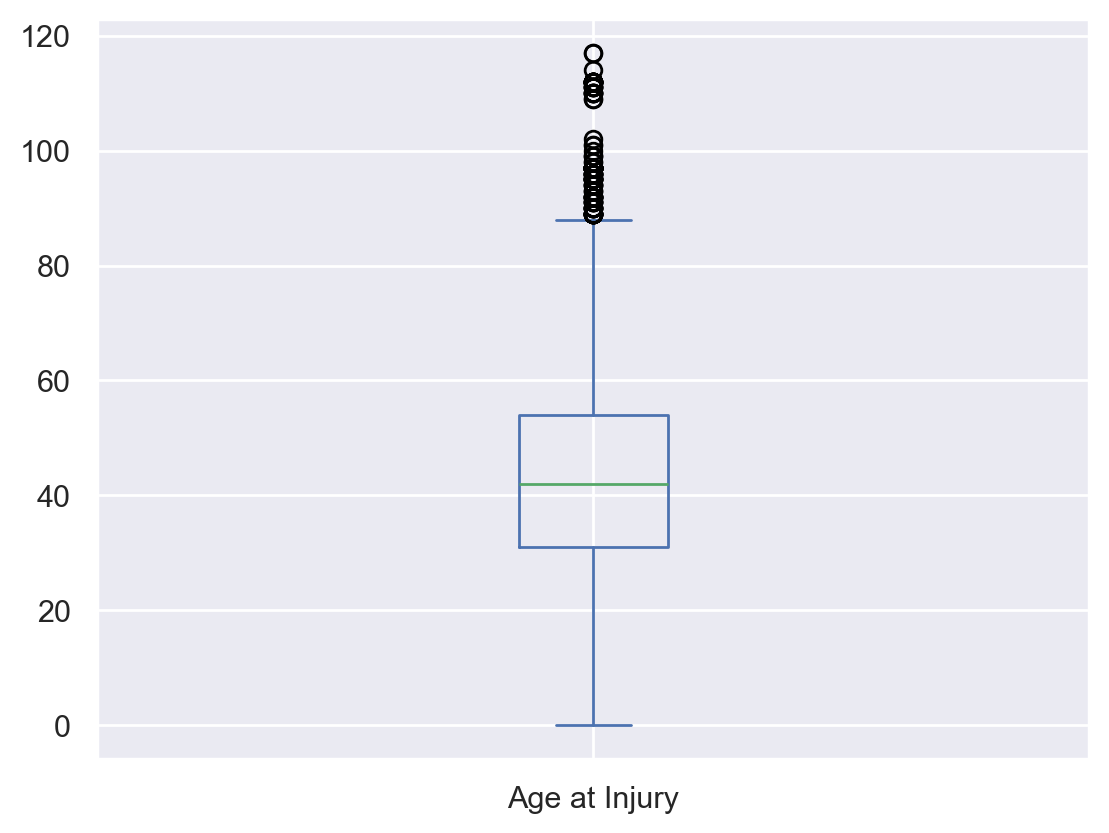

In [222]:
X_train['Age at Injury'].plot(kind='box')

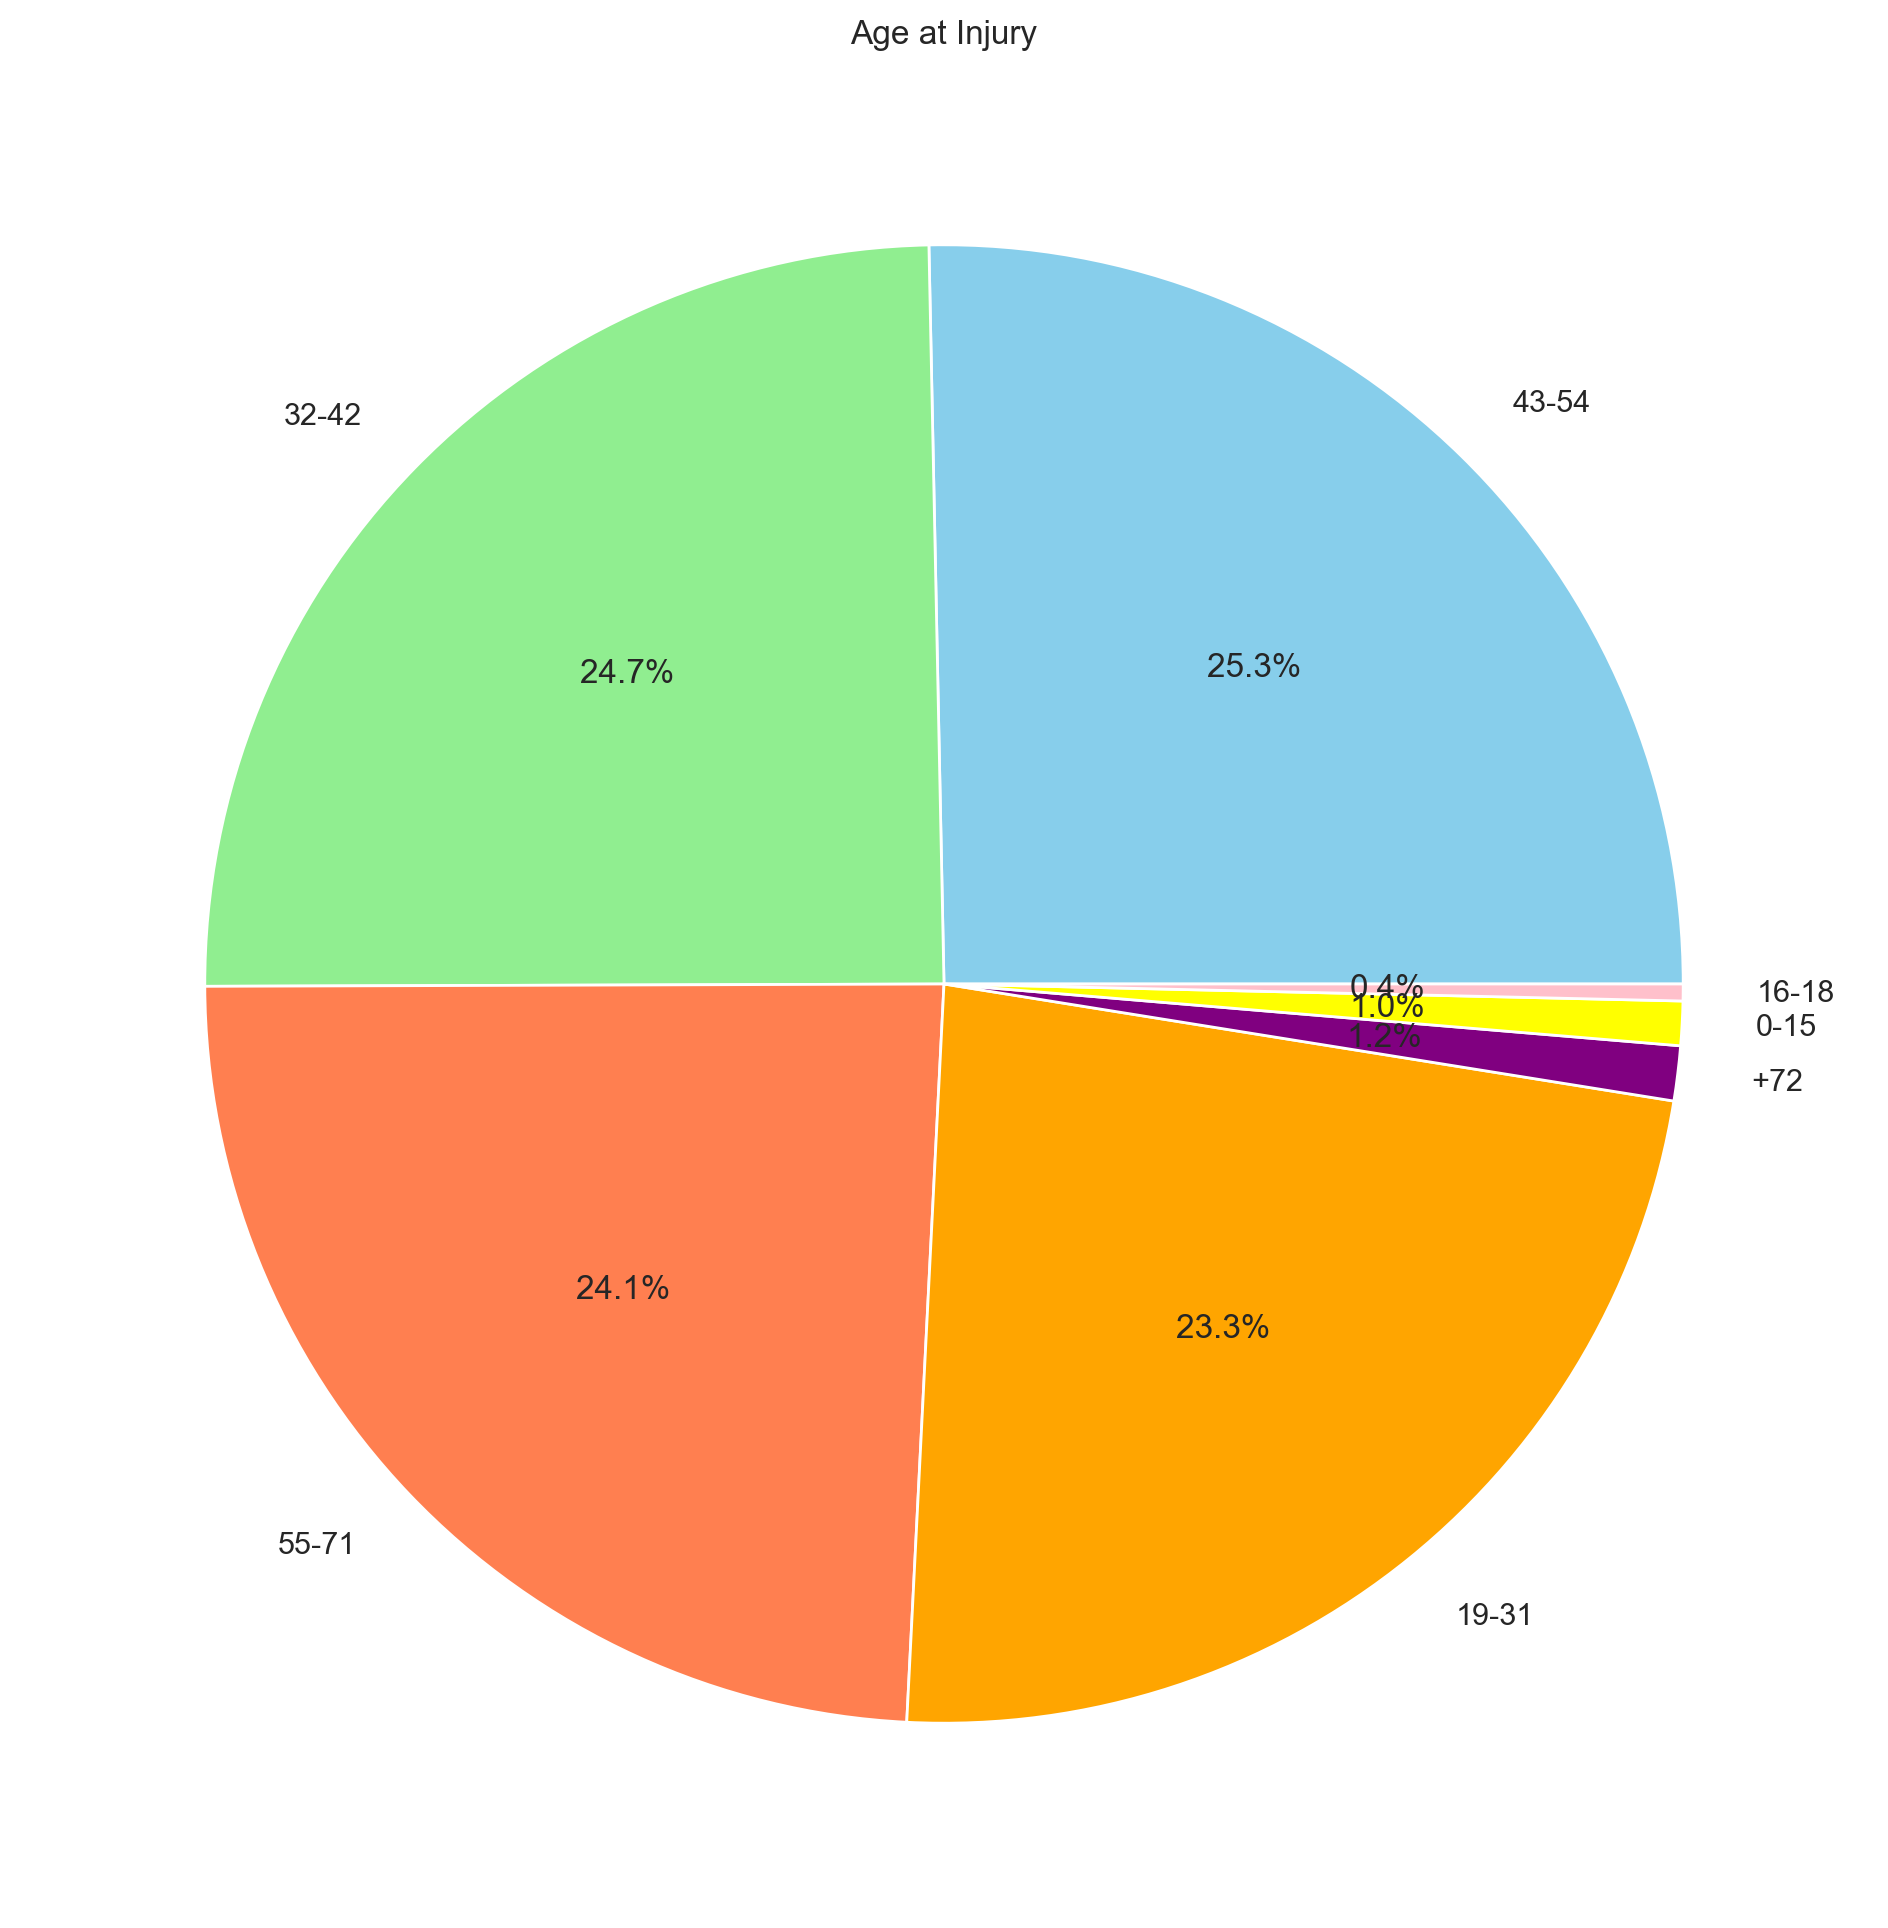

In [223]:
# Define age categories
bins = [0, 15, 18, 31, 42, 54, 71, 117]
labels = ['0-15', '16-18', '19-31', '32-42', '43-54', '55-71', '+72']

# Create a new column for age categories
train_data_copy['Age Category'] = pd.cut(X_train['Age at Injury'], bins=bins, labels=labels, right=False)
age_distribution = train_data_copy['Age Category'].value_counts()

# Plot the pie chart
plt.figure(figsize=(17, 12))  # Set the figure size

age_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'coral', 'orange', 'purple', 'yellow', 'pink'])

# Customize the plot
plt.title('Age at Injury')
plt.ylabel('')  # Remove the default y-label (which shows "Age Category")

# Show the plot
plt.show()

### `Age at Injury`

**Outlier analysis:** <br>

error/strange values:
- 0-15 represent 1% of data
- +72 represents 1,2% of data

**Transforming the most extreme 1% of data on each end:**

In [226]:
lower_quantile = X_train['Age at Injury'].quantile(0.01)  # age 16
upper_quantile = X_train['Age at Injury'].quantile(0.99)  # age 71

In [227]:
X_train['Age at Injury'] = X_train['Age at Injury'].clip(lower=lower_quantile, upper=upper_quantile)

In [228]:
X_val['Age at Injury'] = X_val['Age at Injury'].clip(lower=lower_quantile, upper=upper_quantile)

In [229]:
X_test['Age at Injury'] = X_test['Age at Injury'].clip(lower=lower_quantile, upper=upper_quantile)

In [230]:
# Calculate the non-null percentage and null counts
non_null_percentage = X_train.notna().mean() * 100
null_counts = X_train.isna().sum()

# Convert to a DataFrame for better display
non_null_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

# Sort the DataFrame by Non-Null Percentage
non_null_df.sort_values('Non-Null Percentage', ascending=False)

,Variable,Non-Null Percentage,Null Values
0,Accident Date,100.000000,0
25,WCIO Part Of Body Code,100.000000,0
19,Industry Code Description,100.000000,0
20,Medical Fee Region,100.000000,0
21,WCIO Cause of Injury Code,100.000000,0
22,WCIO Cause of Injury Description,100.000000,0
23,WCIO Nature of Injury Code,100.000000,0
24,WCIO Nature of Injury Description,100.000000,0
26,WCIO Part Of Body Description,100.000000,0
1,Age at Injury,100.000000,0


### `IME-4 Count`

In [232]:
X_train_original[(X_train_original['IME-4 Count'] > 1)]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
485114,2022-05-10,35,N,2022-06-25,Y,1097.00,1986,2022-07-14,2022-06-16,SIRIUSPOINT AMERICA INSURANCE,1,6023025,QUEENS,N,NYC,2022-08-29,M,4,31.0,MANUFACTURING,IV,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,65.0,INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLA...,11368,1,Not Work Related,2
354322,2021-05-19,41,N,2021-11-08,Y,623.35,1980,2021-11-08,2021-11-04,INDEMNITY INS. OF N AMERICA,1,5851908,MONROE,N,ROCHESTER,2023-03-24,F,2,31.0,MANUFACTURING,I,56.0,LIFTING,52.0,STRAIN OR TEAR,38.0,SHOULDER(S),14580,0,Not Work Related,3
401641,2022-02-03,58,N,2022-02-04,Y,1042.13,1963,2022-02-04,NaT,INDEMNITY INS. OF N AMERICA,1,5913931,ALBANY,N,ALBANY,2022-11-14,M,2,31.0,MANUFACTURING,I,32.0,ON ICE OR SNOW,49.0,SPRAIN OR TEAR,32.0,ELBOW,12065,0,Not Work Related,1
193398,2020-12-31,36,N,2021-01-27,Y,1070.03,0,2021-01-28,2021-01-19,CHARTER OAK FIRE INS CO,1,5644560,WESTCHESTER,N,NYC,2021-05-27,M,2,31.0,MANUFACTURING,NaN,56.0,LIFTING,16.0,DISLOCATION,22.0,DISC,33809,1,Not Work Related,2
345515,2021-10-18,30,N,2021-10-22,Y,1443.72,<NA>,2021-10-22,2022-01-12,ARCH INDEMNITY INSURANCE CO,1,5840959,SUFFOLK,N,HAUPPAUGE,2022-04-05,M,2,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",49.0,SPRAIN OR TEAR,34.0,WRIST,11713,0,Not Work Related,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273316,2021-06-13,26,N,2021-06-17,N,349.72,1994,2021-06-18,2021-06-15,GREAT AMERICAN ALLIANCE INS CO,1,5746287,ONONDAGA,N,SYRACUSE,NaT,F,2,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,57.0,PUSHING OR PULLING,52.0,STRAIN OR TEAR,90.0,MULTIPLE BODY PARTS (INCLUDING BODY,13205,0,Not Work Related,2
12293,2020-01-18,36,N,2020-01-22,Y,1775.14,1983,2020-01-22,NaT,STATE INSURANCE FUND,2,5409665,CHEMUNG,N,BINGHAMTON,NaT,M,2,92.0,PUBLIC ADMINISTRATION,I,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",10.0,CONTUSION,54.0,LOWER LEG,14904,0,Not Work Related,3
185617,2020-12-22,64,N,2021-01-12,Y,2706.32,1956,2021-01-12,2021-01-06,OLD REPUBLIC INSURANCE CO.,1,5635527,KINGS,N,NYC,NaT,F,2,31.0,MANUFACTURING,IV,29.0,ON SAME LEVEL,28.0,FRACTURE,34.0,WRIST,11224,0,Not Work Related,3
13616,2019-12-19,46,N,2020-01-24,Y,1100.00,<NA>,2020-05-20,2020-01-22,STATE INSURANCE FUND,2,5410997,SUFFOLK,N,HAUPPAUGE,2020-06-25,M,6,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,IV,75.0,FALLING OR FLYING OBJECT,49.0,SPRAIN OR TEAR,44.0,CHEST,11701,1,Not Work Related,5


### `Birth Year`

We expect Birth Year to be the subtraction between 'Accident Date' year and 'Age at Injury', with ±1year rounding difference. <br>
This doesn't happen in 23473 rows:
- 17441 where Birth Year=0
- 2470 rows where we computed Accident Date with median
- 3562 rows, where we replaced ages lower than 16 and higher than 71 with 16 and 71

In [235]:
# Calculate the expected 'Birth Year' by subtracting 'Age at Injury' from the 'Accident Date' year
X_train['Calculated Birth Year'] = X_train['Accident Date'].dt.year - X_train['Age at Injury']

# Now compare if the calculated 'Birth Year' is within ±1 of the 'Birth Year' in the dataset
X_train['Birth Year Matches'] = (X_train['Birth Year'] >= X_train['Calculated Birth Year'] - 1) & \
                                    (X_train['Birth Year'] <= X_train['Calculated Birth Year'] + 1)

# Count how many True and False values there are
matches_count = X_train['Birth Year Matches'].value_counts()

# Display the results
print("True and False Counts:")
print(matches_count)

True and False Counts:
Birth Year Matches
True     378345
False     23473
Name: count, dtype: Int64


In [236]:
# Calculate the expected 'Birth Year' by subtracting 'Age at Injury' from the 'Accident Date' year
X_train_original['Calculated Birth Year'] = X_train_original['Accident Date'].dt.year - X_train_original['Age at Injury']

# Now compare if the calculated 'Birth Year' is within ±1 of the 'Birth Year' in the dataset
X_train_original['Birth Year Matches'] = (X_train_original['Birth Year'] >= X_train_original['Calculated Birth Year'] - 1) & \
                                    (X_train_original['Birth Year'] <= X_train_original['Calculated Birth Year'] + 1)

# Count how many True and False values there are
matches_count = X_train_original['Birth Year Matches'].value_counts()

# Display the results
print("True and False Counts:")
print(matches_count)

True and False Counts:
Birth Year Matches
True     361657
False     17441
Name: count, dtype: Int64


In [237]:
X_train_original[X_train_original['Birth Year Matches'] == False][['Age at Injury', 'Accident Date', 'Birth Year']]
#originally, in all rows where Birth Year isn't the difference between accident date - age at injury, with 1 error margin, the Birth Year=0 (17441)
#but then, we force ages <16 and >71 to be 16 and 71, respectively, which adds to the count (3562)
#and we computed misisng values of accident date as median (+2470 rows)

,Age at Injury,Accident Date,Birth Year
189712,57,2021-01-19,0
193398,36,2020-12-31,0
350903,0,2021-09-09,0
327295,34,2021-09-13,0
299578,40,2021-04-14,0
...,...,...,...
85474,57,2020-06-17,0
116895,0,2020-08-10,0
401930,39,2022-01-19,0
468807,42,2022-04-05,0


In [238]:
# Calculate the expected 'Birth Year' by subtracting 'Age at Injury' from the 'Accident Date' year
X_val['Calculated Birth Year'] = X_val['Accident Date'].dt.year - X_val['Age at Injury']

# Now compare if the calculated 'Birth Year' is within ±1 of the 'Birth Year' in the dataset
X_val['Birth Year Matches'] = (X_val['Birth Year'] >= X_val['Calculated Birth Year'] - 1) & \
                                    (X_val['Birth Year'] <= X_val['Calculated Birth Year'] + 1)

# Count how many True and False values there are
matches_count = X_val['Birth Year Matches'].value_counts()

# Display the results
print("True and False Counts:")
print(matches_count)

True and False Counts:
Birth Year Matches
True     162223
False      9985
Name: count, dtype: Int64


In [239]:
# Calculate the expected 'Birth Year' by subtracting 'Age at Injury' from the 'Accident Date' year
X_test['Calculated Birth Year'] = X_test['Accident Date'].dt.year - X_test['Age at Injury']

# Now compare if the calculated 'Birth Year' is within ±1 of the 'Birth Year' in the dataset
X_test['Birth Year Matches'] = (X_test['Birth Year'] >= X_test['Calculated Birth Year'] - 1) & \
                                    (X_test['Birth Year'] <= X_test['Calculated Birth Year'] + 1)

# Count how many True and False values there are
matches_count = X_test['Birth Year Matches'].value_counts()

# Display the results
print("True and False Counts:")
print(matches_count)

True and False Counts:
Birth Year Matches
True     362011
False     25964
Name: count, dtype: int64


**To treat outliers of Birth Year we can replace 0 values with the subtraction between 'Accident Date' year and 'Age at Injury':**

In [241]:
X_train['Birth Year'] = X_train.apply(
    lambda x: x['Accident Date'].year - x['Age at Injury'] if x['Birth Year Matches'] == False else x['Birth Year'], 
    axis=1)

In [242]:
X_val['Birth Year'] = X_val.apply(
    lambda x: x['Accident Date'].year - x['Age at Injury'] if x['Birth Year Matches'] == False else x['Birth Year'], 
    axis=1)

In [243]:
X_test['Birth Year'] = X_test.apply(
    lambda x: x['Accident Date'].year - x['Age at Injury'] if x['Birth Year Matches'] == False else x['Birth Year'], 
    axis=1)

In [244]:
X_train.shape

(401818, 36)

In [245]:
len(X_train[(X_train['Birth Year'] + X_train['Age at Injury'] >= X_train['Accident Date'].dt.year - 1) & 
        (X_train['Birth Year'] + X_train['Age at Injury'] <= X_train['Accident Date'].dt.year + 1)])

401818

In [246]:
X_train['Birth Year'] = X_train['Birth Year'].astype('Int64')

In [247]:
X_val['Birth Year'] = X_val['Birth Year'].astype('Int64')

In [248]:
X_test['Birth Year'] = X_test['Birth Year'].astype('Int64')

`Average Weekly Wage`

In [250]:
X_train[X_train['Average Weekly Wage'] == 0][['Industry Code','Industry Code Description']].value_counts()

Industry Code  Industry Code Description                                   
62.0           HEALTH CARE AND SOCIAL ASSISTANCE                               54141
92.0           PUBLIC ADMINISTRATION                                           30902
44.0           RETAIL TRADE                                                    29198
61.0           EDUCATIONAL SERVICES                                            21587
48.0           TRANSPORTATION AND WAREHOUSING                                  18531
31.0           MANUFACTURING                                                   15537
72.0           ACCOMMODATION AND FOOD SERVICES                                 12350
23.0           CONSTRUCTION                                                    10106
56.0           ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT     8352
42.0           WHOLESALE TRADE                                                  5753
81.0           OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)              

In [251]:
industry_mean_wage

{11.0: 366.63771951989895,
 21.0: 540.4853579175705,
 22.0: 1039.6278400407539,
 23.0: 779.0094038668099,
 31.0: 419.0181971257391,
 42.0: 482.2155124407583,
 44.0: 240.3076961237294,
 48.0: 651.218907803388,
 51.0: 1066.2010414944618,
 52.0: 373.63261013215856,
 53.0: 499.38224344885884,
 54.0: 289.6711896605419,
 55.0: 318.708125,
 56.0: 380.2599359202563,
 61.0: 283.19673800061145,
 62.0: 421.9567239479261,
 71.0: 311.370480349345,
 72.0: 226.33028399066643,
 81.0: 364.12730651210364,
 92.0: 834.9543525977626}

In [252]:
# List of industry codes where no wage is acceptable - volunteer firefighters, ambulance drivers and possibly other civil defense workers
zero_wage_ind = [56.0, 92.0, 62.0]

In [253]:
# Replace 0 in 'Average Weekly Wage' column
X_train['Average Weekly Wage'] = X_train.apply(
    lambda row: row['Average Weekly Wage'] if row['Industry Code'] in zero_wage_ind
    else industry_mean_wage.get(row['Industry Code'], row['Average Weekly Wage'])
    if row['Average Weekly Wage'] == 0 else row['Average Weekly Wage'],
    axis=1)

In [254]:
# Replace 0 in 'Average Weekly Wage' column
X_val['Average Weekly Wage'] = X_val.apply(
    lambda row: row['Average Weekly Wage'] if row['Industry Code'] in zero_wage_ind
    else industry_mean_wage.get(row['Industry Code'], row['Average Weekly Wage'])
    if row['Average Weekly Wage'] == 0 else row['Average Weekly Wage'],
    axis=1)

In [255]:
# Replace 0 in 'Average Weekly Wage' column
X_test['Average Weekly Wage'] = X_test.apply(
    lambda row: row['Average Weekly Wage'] if row['Industry Code'] in zero_wage_ind
    else industry_mean_wage.get(row['Industry Code'], row['Average Weekly Wage'])
    if row['Average Weekly Wage'] == 0 else row['Average Weekly Wage'],
    axis=1)

In [256]:
X_test[X_test['Average Weekly Wage'] == 0][['Industry Code','Industry Code Description']].value_counts()

Industry Code  Industry Code Description                                   
62.0           HEALTH CARE AND SOCIAL ASSISTANCE                               66502
92.0           PUBLIC ADMINISTRATION                                           42470
56.0           ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT    10835
Name: count, dtype: int64

### Outliers Summary:
For now, we only treated outliers that will solve missing data
- Removed outliers of age an Birth Year

In [258]:
X_train.shape

(401818, 36)

In [259]:
X_val.shape

(172208, 36)

In [260]:
X_test.shape

(387975, 34)

## 2.4 Categorical Data <a name="24-categorical-data"></a>


Missing values that weren't yet analysed, represented as 'MISSING': <br>

`WCIO Cause of Injury Code` (15640) <br>
`WCIO Cause of Injury Description` (15640) <br>
`WCIO Part Of Body Description` (17082) <br>
`WCIO Part Of Body Code` (17082) <br>

In [263]:
X_test.describe(include=['object', 'category']).T

,count,unique,top,freq
Alternative Dispute Resolution,387975,2,N,386315
Attorney/Representative,387975,2,N,306476
Carrier Name,387975,1598,STATE INSURANCE FUND,66189
Carrier Type,387975,5,1,203469
County of Injury,387975,62,QUEENS,41260
COVID-19 Indicator,387975,2,N,385434
District Name,387975,8,NYC,187972
Gender,387975,3,M,220683
Industry Code Description,387975,20,HEALTH CARE AND SOCIAL ASSISTANCE,79943
Medical Fee Region,387975,4,IV,203253


In [264]:
unique = X_train.select_dtypes(include=['object', 'category']).apply(lambda x: x.unique(), axis=0)
pd.set_option('display.max_colwidth', 100)  # No limit on column width
unique

Alternative Dispute Resolution                                                                                                    [N, Y]
Attorney/Representative                                                                                                           [N, Y]
Carrier Name                         [STATE INSURANCE FUND, SIRIUSPOINT AMERICA INSURANCE, INDEMNITY INS. OF N AMERICA, SECURITY NATI...
Carrier Type                                                                                                             [2, 1, 3, 4, 5]
County of Injury                     [CAYUGA, QUEENS, MONROE, ALBANY, KINGS, WESTCHESTER, JEFFERSON, NEW YORK, BROOME, NASSAU, CHEMUN...
COVID-19 Indicator                                                                                                                [N, Y]
District Name                                              [SYRACUSE, NYC, ROCHESTER, ALBANY, BINGHAMTON, HAUPPAUGE, BUFFALO, STATEWIDE]
Gender                                   

## Further Inspection

Data where Cause of Injury is COVID-19 but COVID-19 Indicator is 'N':

In [267]:
X_train[(X_train['WCIO Nature of Injury Description'] == 'COVID-19') &(X_train['COVID-19 Indicator']== 'N')]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,First Hearing,C-3 Delivery,C-2 Delivery,Calculated Birth Year,Birth Year Matches
356565,2021-06-27,16,N,2021-11-10,Y,2508.720000,2005,2021-11-15,2021-11-08,STATE INSURANCE FUND,2,5854179,SUFFOLK,N,HAUPPAUGE,2022-01-21,M,0,92.0,PUBLIC ADMINISTRATION,IV,83.0,PANDEMIC,83.0,COVID-19,60.0,LUNGS,11743,0,Not Work Related,6,1,1,1,2005,False
253867,2021-06-27,16,N,2021-05-13,Y,0.000000,2005,2021-05-21,2021-05-10,AMERICAN ZURICH INSURANCE CO,1,5721505,WESTCHESTER,N,NYC,2021-06-28,F,0,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT,III,83.0,PANDEMIC,83.0,COVID-19,60.0,LUNGS,10502,1,Not Work Related,5,1,1,1,2005,False
376677,2021-06-27,16,N,2021-12-17,N,0.000000,2005,2021-12-23,2021-12-15,HARTFORD FIRE INSURANCE CO,1,5879910,KINGS,N,NYC,NaT,M,0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,83.0,PANDEMIC,83.0,COVID-19,99.0,WHOLE BODY,11206,0,Not Work Related,4,0,1,1,2005,False
333495,2021-06-27,16,N,2021-10-01,Y,0.000000,2005,2021-10-22,2021-09-24,TRINITY HEALTH CORPORATION,4,5823482,RENSSELAER,N,ALBANY,NaT,F,0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,83.0,PANDEMIC,83.0,COVID-19,60.0,LUNGS,12182,0,Not Work Related,0,0,1,1,2005,False
180481,2021-06-27,16,N,2020-12-31,N,0.000000,2005,2021-02-10,2020-12-22,STATE INSURANCE FUND,2,5627033,SULLIVAN,N,ALBANY,NaT,F,0,92.0,PUBLIC ADMINISTRATION,I,99.0,"OTHER - MISCELLANEOUS, NOC",83.0,COVID-19,60.0,LUNGS,12754,0,Not Work Related,0,0,1,1,2005,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194205,2021-06-27,16,N,2021-01-28,N,419.018197,2005,2021-02-05,2021-01-21,AMERICAN CASUALTY CO OF,1,5645503,KINGS,N,NYC,NaT,M,0,31.0,MANUFACTURING,IV,83.0,PANDEMIC,83.0,COVID-19,91.0,BODY SYSTEMS AND MULTIPLE BODY SYSTEMS,11203,0,Not Work Related,1,0,1,1,2005,False
122322,2021-06-27,16,N,2020-09-03,Y,1066.201041,2005,2020-09-15,2020-08-31,AIU INSURANCE CO,1,5550998,ORANGE,N,ALBANY,2020-11-02,F,2,51.0,INFORMATION,III,83.0,PANDEMIC,83.0,COVID-19,60.0,LUNGS,10941,0,Not Work Related,0,1,1,1,2005,False
266062,2021-06-27,16,N,2021-06-07,Y,0.000000,2005,2022-03-25,2021-06-02,HEALTH & HOSPITAL CORP.,3,5738316,KINGS,N,NYC,NaT,F,0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,83.0,PANDEMIC,83.0,COVID-19,48.0,INTERNAL ORGANS,11693,0,Not Work Related,1,0,1,1,2005,False
91035,2021-06-27,16,N,2020-07-07,Y,0.000000,2005,2020-11-07,2020-06-25,LIBERTY MUTUAL FIRE INS CO,1,5510707,SUFFOLK,N,HAUPPAUGE,2020-12-14,F,0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,83.0,PANDEMIC,83.0,COVID-19,91.0,BODY SYSTEMS AND MULTIPLE BODY SYSTEMS,11703,1,Not Work Related,2,1,1,1,2005,False


**Select dataset where 'Cause of Injury' is 'Covid-19' but 'Covid-19 Indicator' is 'N', and update those values for 'Y':**

In [269]:
covid_no_match = (X_train['WCIO Nature of Injury Description'] == 'COVID-19') & (X_train['COVID-19 Indicator'] == 'N')

In [270]:
# Update 'COVID-19 Indicator' to 'Y' for these rows
X_train.loc[covid_no_match, 'COVID-19 Indicator'] = 'Y'

**Do the same in val and test dataset:**

In [272]:
covid_no_match_val = (X_val['WCIO Nature of Injury Description'] == 'COVID-19') & (X_val['COVID-19 Indicator'] == 'N')

In [273]:
covid_no_match_test = (X_test['WCIO Nature of Injury Description'] == 'COVID-19') & (X_test['COVID-19 Indicator'] == 'N')

In [274]:
# Update 'COVID-19 Indicator' to 'Y' for these rows
X_val.loc[covid_no_match_val, 'COVID-19 Indicator'] = 'Y'

In [275]:
# Update 'COVID-19 Indicator' to 'Y' for these rows
X_test.loc[covid_no_match_test, 'COVID-19 Indicator'] = 'Y'

**Doublecheck results:**

In [277]:
X_train[(X_train['WCIO Nature of Injury Description'] == 'COVID-19') & (X_train['COVID-19 Indicator'] == 'N')]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,First Hearing,C-3 Delivery,C-2 Delivery,Calculated Birth Year,Birth Year Matches


### Summary of Categorical Data

can become binary: <br>
`Attorney/Representative` <br>
`COVID-19 Indicator` <br>
`WCB Decision` <br>
`Alternative Dispute Resolution`  <br>
`Gender` - there are 45 non binary, which could be interpreted as 0 - not male

could be represented by numbers instead of strings : <br>
`Medical Fee Region` <br>

## 2.6 Feature Engineering <a name="26-feature-engineering"></a>


In [280]:
X_val.dtypes

Accident Date                        datetime64[ns]
Age at Injury                                 Int64
Alternative Dispute Resolution               object
Assembly Date                        datetime64[ns]
Attorney/Representative                      object
Average Weekly Wage                         float64
Birth Year                                    Int64
C-2 Date                             datetime64[ns]
C-3 Date                             datetime64[ns]
Carrier Name                                 object
Carrier Type                                 object
Claim Identifier                              int64
County of Injury                             object
COVID-19 Indicator                           object
District Name                                object
First Hearing Date                   datetime64[ns]
Gender                                       object
IME-4 Count                                   Int64
Industry Code                               float64
Industry Cod

#### New features based on existing ones

In [282]:
X_train['Days from Accident to C-2'] = (X_train['C-2 Date'] - X_train['Accident Date']).dt.days.astype('Int64')
X_val['Days from Accident to C-2'] = (X_val['C-2 Date'] - X_val['Accident Date']).dt.days.astype('Int64')
X_test['Days from Accident to C-2'] = (X_test['C-2 Date'] - X_test['Accident Date']).dt.days.astype('Int64')

In [283]:
median_c2 = X_train['Days from Accident to C-2'].median()

In [284]:
X_train['Days from Accident to C-2'] = X_train['Days from Accident to C-2'].fillna(median_c2)
X_val['Days from Accident to C-2'] = X_val['Days from Accident to C-2'].fillna(median_c2)
X_test['Days from Accident to C-2'] = X_test['Days from Accident to C-2'].fillna(median_c2)

In [285]:
X_train['Days from Accident to C-3'] = (X_train['C-3 Date'] - X_train['Accident Date']).dt.days.astype('Int64')
X_val['Days from Accident to C-3'] = (X_val['C-3 Date'] - X_val['Accident Date']).dt.days.astype('Int64')
X_test['Days from Accident to C-3'] = (X_test['C-3 Date'] - X_val['Accident Date']).dt.days.astype('Int64')

In [286]:
X_train['Days from Accident to C-2'].describe()

count      401818.0
mean      68.370337
std      502.738844
min         -8842.0
25%             5.0
50%            10.0
75%            26.0
max         21439.0
Name: Days from Accident to C-2, dtype: Float64

In [287]:
X_train['C-2 Date'].describe()

count                           391631
mean     2021-07-17 00:00:21.840967936
min                1996-01-12 00:00:00
25%                2020-11-06 00:00:00
50%                2021-08-09 00:00:00
75%                2022-04-27 00:00:00
max                2024-06-01 00:00:00
Name: C-2 Date, dtype: object

In [288]:
X_train.columns[X_train.columns.str.startswith('Days')]

Index(['Days from Accident to C-2', 'Days from Accident to C-3'], dtype='object')

In [289]:
X_train['Days from Accident to Assembly'] = (X_train['Assembly Date'] - X_train['Accident Date']).dt.days.astype('Int64')

In [290]:
X_val['Days from Accident to Assembly'] = (X_val['Assembly Date'] - X_val['Accident Date']).dt.days.astype('Int64')

In [291]:
X_test['Days from Accident to Assembly'] = (X_test['Assembly Date'] - X_test['Accident Date']).dt.days.astype('Int64')

In [292]:
X_train.isna().sum()

Accident Date                             0
Age at Injury                             0
Alternative Dispute Resolution            0
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                       0
Birth Year                                0
C-2 Date                              10187
C-3 Date                             271096
Carrier Name                              0
Carrier Type                              0
Claim Identifier                          0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                   296314
Gender                                    0
IME-4 Count                               0
Industry Code                             0
Industry Code Description                 0
Medical Fee Region                        0
WCIO Cause of Injury Code                 0
WCIO Cause of Injury Description

#### New features based on data insights

`C-2/C-3 under Deadline`, a binary outcome feature where:
- 0=  no, it was delivered over the deadline,
- 1= yes, it was delivered under the deadline and
- error means form was delivered before there was an accident

In [295]:
X_train['C-2 under Deadline'] = X_train['Days from Accident to C-2'].apply(
    lambda x: "yes" if (x >= 0 and x <= 10) else ("no" if x > 10 else ("no info" if pd.isna(x) else "error")))

In [296]:
X_val['C-2 under Deadline'] = X_val['Days from Accident to C-2'].apply(
    lambda x: "yes" if (x >= 0 and x <= 10) else ("no" if x > 10 else ("no info" if pd.isna(x) else "error")))

In [297]:
X_test['C-2 under Deadline'] = X_test['Days from Accident to C-2'].apply(
    lambda x: "yes" if (x >= 0 and x <= 10) else ("no" if x > 10 else ("no info" if pd.isna(x) else "error")))

In [298]:
X_train['C-2 under Deadline'].value_counts()

C-2 under Deadline
yes      213533
no       186851
error      1434
Name: count, dtype: int64

In [299]:
X_train['C-3 under Deadline'] = X_train['Days from Accident to C-3'].apply(
    lambda x: "yes" if (x >= 0 and x <= 731) else ("no" if x > 731 else ("no info" if pd.isna(x) else "error")))

In [300]:
X_val['C-3 under Deadline'] = X_val['Days from Accident to C-3'].apply(
    lambda x: "yes" if (x >= 0 and x <= 731) else ("no" if x > 731 else ("no info" if pd.isna(x) else "error")))

In [301]:
X_test['C-3 under Deadline'] = X_test['Days from Accident to C-3'].apply(
    lambda x: "yes" if (x >= 0 and x <= 731) else ("no" if x > 731 else ("no info" if pd.isna(x) else "error")))

In [302]:
X_test['C-3 under Deadline'].value_counts()

C-3 under Deadline
no info    363181
no          24681
yes           109
error           4
Name: count, dtype: int64

`Forms Deadline`

In [304]:
X_train['Forms Deadline'] = (
    (X_train['C-2 under Deadline'] == "yes") &
    (X_train['C-3 under Deadline'] == "yes"))

In [305]:
X_val['Forms Deadline'] = (
    (X_val['C-2 under Deadline'] == "yes") &
    (X_val['C-3 under Deadline'] == "yes"))

In [306]:
X_test['Forms Deadline'] = (
    (X_test['C-2 under Deadline'] == "yes") &
    (X_test['C-3 under Deadline'] == "yes"))

In [307]:
X_train['Forms Deadline'].value_counts()

Forms Deadline
False    348659
True      53159
Name: count, dtype: int64

In [308]:
X_train['Forms Deadline'] = X_train['Forms Deadline'].apply(lambda x: 1 if x is True else 0)

In [309]:
X_val['Forms Deadline'] = X_val['Forms Deadline'].apply(lambda x: 1 if x is True else 0)
X_test['Forms Deadline'] = X_test['Forms Deadline'].apply(lambda x: 1 if x is True else 0)

In [310]:
X_train['Forms Deadline'].value_counts()

Forms Deadline
0    348659
1     53159
Name: count, dtype: int64

`Forms Delivered Count`

Count with the number of forms delivered for the claim file (IME-4, C-2 and C-3)

In [312]:
X_train['Forms Delivered Count']=X_train['C-2 Delivery'] + X_train['C-3 Delivery'] + X_train['IME-4 Count']

In [313]:
X_val['Forms Delivered Count']=X_val['C-2 Delivery'] + X_val['C-3 Delivery'] + X_val['IME-4 Count']

In [314]:
X_test['Forms Delivered Count']=X_test['C-2 Delivery'] + X_test['C-3 Delivery'] + X_test['IME-4 Count']

In [315]:
X_train['Forms Delivered Count'].value_counts()

Forms Delivered Count
1     248121
2      64688
3      26556
4      20282
5      10832
6       8360
7       5097
0       4401
8       4033
9       2648
10      2003
11      1280
12       955
13       698
14       525
15       356
16       262
17       182
18       135
20        97
19        85
21        50
22        45
23        36
24        21
25        17
26        10
29         8
27         6
30         4
34         4
28         4
31         3
33         2
38         2
41         2
32         2
50         1
49         1
39         1
37         1
75         1
36         1
Name: count, dtype: Int64

`Claim Antiguity`

In [317]:
X_train['Claim Antiguity'] = X_train['Claim Identifier'].rank(method='dense').astype(int)

In [318]:
X_val['Claim Antiguity'] = X_val['Claim Identifier'].rank(method='dense').astype(int)

In [319]:
X_test['Claim Antiguity'] = X_test['Claim Identifier'].rank(method='dense').astype(int)

In [320]:
X_train['Claim Antiguity'].value_counts()

Claim Antiguity
44244     1
342067    1
364389    1
96393     1
48387     1
         ..
216143    1
110003    1
156623    1
158830    1
89628     1
Name: count, Length: 401818, dtype: int64

`Validity of Claim`, a binary outcome variable that determines whether or not the claim files is valid, by checking that:
- all mandatory forms were delivered
- from accident date to c-3 form, there is a logical sequence

In [322]:
X_train['Valid Full Claim'] = (
    (X_train['Accident Date'] <= X_train['C-2 Date']) &
    (X_train['Accident Date'] <= X_train['C-3 Date']) &
    (X_train['C-2 under Deadline'] == "yes") &
    (X_train['C-3 under Deadline'] == "yes"))

In [323]:
X_val['Valid Full Claim'] = (
    (X_val['Accident Date'] <= X_val['C-2 Date']) &
    (X_val['Accident Date'] <= X_val['C-3 Date']) &
    (X_val['C-2 under Deadline'] == "yes") &
    (X_val['C-3 under Deadline'] == "yes"))

In [324]:
X_test['Valid Full Claim'] = (
    (X_test['Accident Date'] <= X_test['C-2 Date']) &
    (X_test['Accident Date'] <= X_test['C-3 Date']) &
    (X_test['C-2 under Deadline'] == "yes") &
    (X_test['C-3 under Deadline'] == "yes"))

In [325]:
X_train['Valid Full Claim'].value_counts()

Valid Full Claim
False    353591
True      48227
Name: count, dtype: int64

In [326]:
X_train['Valid Full Claim'] = X_train['Valid Full Claim'].apply(lambda x: 1 if x is True else 0)

In [327]:
X_val['Valid Full Claim'] = X_val['Valid Full Claim'].apply(lambda x: 1 if x is True else 0)
X_test['Valid Full Claim'] = X_test['Valid Full Claim'].apply(lambda x: 1 if x is True else 0)

In [527]:
X_train['Valid Full Claim'].value_counts()

Valid Full Claim
0    353591
1     48227
Name: count, dtype: int64

# Problems:
- there are days from accident to first hearing =200 with first hearing=0(there wasn't one)
- if we fill days from accident to C-3/C-2 with median, we are telling false info (in some cases, there wasn't a form delivered
- confirm that error in deadlines would also happened with original values of accident date, before median

**Modify Existing Features:**

In [531]:
# List of date columns to modify
date_columns = ['Accident Date', 'Assembly Date']

In [533]:
# Extract only the year part for each column and convert to Int64
for col in date_columns:
    X_train[col] = pd.to_datetime(X_train[col], errors='coerce').dt.year.astype('Int64')
    X_val[col] = pd.to_datetime(X_val[col], errors='coerce').dt.year.astype('Int64')
    X_test[col] = pd.to_datetime(X_test[col], errors='coerce').dt.year.astype('Int64')

In [534]:
# Renaming columns
X_train.rename(columns={
    'Accident Date': 'Accident Year',
    'Assembly Date': 'Assembly Year'}, inplace=True)

In [536]:
# Renaming columns
X_val.rename(columns={
    'Accident Date': 'Accident Year',
    'Assembly Date': 'Assembly Year'}, inplace=True)

In [537]:
# Renaming columns
X_test.rename(columns={
    'Accident Date': 'Accident Year',
    'Assembly Date': 'Assembly Year'}, inplace=True)

#### Discard attributes added or already modified

We created and transformed all columns needed based on dates, we can now drop date time attributes. <br>
Same for columns created for analysis:

In [543]:
X_train.columns

Index(['Accident Year', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Year', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'First Hearing Date', 'Gender', 'IME-4 Count',
       'Industry Code', 'Industry Code Description', 'Medical Fee Region',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Agreement Reached', 'WCB Decision', 'Number of Dependents',
       'First Hearing', 'C-3 Delivery', 'C-2 Delivery',
       'Calculated Birth Year', 'Birth Year Matches',
       'Days from Accident to C-2', 'Days from Accident to C-3',
       'Days from Accident to Assembly', 'C-2 under Deadline',
       'C-3 under Deadline', 

In [544]:
X_train.isna().sum()

Accident Year                             0
Age at Injury                             0
Alternative Dispute Resolution            0
Assembly Year                             0
Attorney/Representative                   0
Average Weekly Wage                       0
Birth Year                                0
C-2 Date                              10187
C-3 Date                             271096
Carrier Name                              0
Carrier Type                              0
Claim Identifier                          0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                   296314
Gender                                    0
IME-4 Count                               0
Industry Code                             0
Industry Code Description                 0
Medical Fee Region                        0
WCIO Cause of Injury Code                 0
WCIO Cause of Injury Description

In [545]:
drop_cols = ['C-2 Date', 'C-3 Date','First Hearing Date', 'Calculated Birth Year', 'Birth Year Matches', 'Days from Accident to C-3']

In [547]:
X_train = X_train.drop(columns =drop_cols)

In [548]:
X_val = X_val.drop(columns = drop_cols)

In [550]:
X_test = X_test.drop(columns = drop_cols)

#### Changing Nature to Binary

**Turn Alternative Dispute Resolution, Attorney/Representative' and 'COVID-19 Indicator' into a binary outcome feature, where Y=1 and N=0:**

In [554]:
# Substituir 'N' por 0 e 'Y' por 1 em variáveis específicas
X_train[['Alternative Dispute Resolution', 'Attorney/Representative', 'COVID-19 Indicator']] = X_train[['Alternative Dispute Resolution','Attorney/Representative', 'COVID-19 Indicator']].replace({'N': 0, 'Y': 1})

In [555]:
# Substituir 'N' por 0 e 'Y' por 1 em variáveis específicas
X_val[['Alternative Dispute Resolution', 'Attorney/Representative', 'COVID-19 Indicator']] = X_val[['Alternative Dispute Resolution','Attorney/Representative', 'COVID-19 Indicator']].replace({'N': 0, 'Y': 1})

In [557]:
# Substituir 'N' por 0 e 'Y' por 1 em variáveis específicas
X_test[['Alternative Dispute Resolution', 'Attorney/Representative', 'COVID-19 Indicator']] = X_test[['Alternative Dispute Resolution','Attorney/Representative', 'COVID-19 Indicator']].replace({'N': 0, 'Y': 1})

**Turn WCB Decision into binary, where 0=Not Work Related and 1=Work Related:**

In [560]:
X_train['WCB Decision'] = X_train['WCB Decision'].apply(lambda x: 0 if x == 'Not Work Related' else 1)

In [562]:
X_val['WCB Decision'] = X_val['WCB Decision'].apply(lambda x: 0 if x == 'Not Work Related' else 1)

**Turn Gender into binary, where 0=not male and 1=Male:**

In [564]:
X_train['Gender'] = X_train['Gender'].apply(lambda x: 1 if x == 'M' else 0)

In [565]:
X_val['Gender'] = X_val['Gender'].apply(lambda x: 1 if x == 'M' else 0)

In [567]:
X_test['Gender'] = X_test['Gender'].apply(lambda x: 1 if x == 'M' else 0)

#### Change from string to numeric representation:

**Turn Medical Fee Region into numeric:**

In [571]:
X_train['Medical Fee Region'] = X_train['Medical Fee Region'].replace({'I':1, 'II':2, 'IV':4, 'III':3})

In [573]:
X_val['Medical Fee Region'] = X_val['Medical Fee Region'].replace({'I':1, 'II':2, 'IV':4, 'III':3})

In [574]:
X_test['Medical Fee Region'] = X_test['Medical Fee Region'].replace({'I':1, 'II':2, 'IV':4, 'III':3})

In [575]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172208 entries, 386776 to 113888
Data columns (total 39 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Accident Year                      172208 non-null  Int64  
 1   Age at Injury                      172208 non-null  Int64  
 2   Alternative Dispute Resolution     172208 non-null  int64  
 3   Assembly Year                      172208 non-null  Int64  
 4   Attorney/Representative            172208 non-null  int64  
 5   Average Weekly Wage                172208 non-null  float64
 6   Birth Year                         172208 non-null  Int64  
 7   Carrier Name                       172208 non-null  object 
 8   Carrier Type                       172208 non-null  object 
 9   Claim Identifier                   172208 non-null  int64  
 10  County of Injury                   172208 non-null  object 
 11  COVID-19 Indicator                 1722

**Drop descriptive columns with corresponding code:**

In [578]:
columns_to_drop =X_train.columns[X_train.columns.str.endswith('Description')]
columns_to_drop

Index(['Industry Code Description', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Description'],
      dtype='object')

In [580]:
X_train = X_train.drop(columns=columns_to_drop)
X_val = X_val.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)

In [581]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387975 entries, 0 to 387974
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Accident Year                   387975 non-null  Int64  
 1   Age at Injury                   387975 non-null  int64  
 2   Alternative Dispute Resolution  387975 non-null  int64  
 3   Assembly Year                   387975 non-null  Int64  
 4   Attorney/Representative         387975 non-null  int64  
 5   Average Weekly Wage             387975 non-null  float64
 6   Birth Year                      387975 non-null  Int64  
 7   Carrier Name                    387975 non-null  object 
 8   Carrier Type                    387975 non-null  object 
 9   Claim Identifier                387975 non-null  int64  
 10  County of Injury                387975 non-null  object 
 11  COVID-19 Indicator              387975 non-null  int64  
 12  District Name   

**Updating datatypes, to distinguish numerical features from categorical, for Feature Selection:**

In [583]:
col_to_objects = ['Industry Code', 'Medical Fee Region', 'WCIO Nature of Injury Code']

In [586]:
binary = ['Alternative Dispute Resolution', 'Attorney/Representative', 'COVID-19 Indicator', 'Gender', 'Agreement Reached', 'WCB Decision', 'Forms Deadline', 'Valid Full Claim']
#ARE BINARIES TREATED AS NUMERICAL OR CATEGORIES FOR FEATURE SELECTION?

In [588]:
X_train.columns

Index(['Accident Year', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Year', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'Carrier Name', 'Carrier Type', 'Claim Identifier',
       'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender',
       'IME-4 Count', 'Industry Code', 'Medical Fee Region',
       'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code',
       'WCIO Part Of Body Code', 'Zip Code', 'Agreement Reached',
       'WCB Decision', 'Number of Dependents', 'First Hearing', 'C-3 Delivery',
       'C-2 Delivery', 'Days from Accident to C-2',
       'Days from Accident to Assembly', 'C-2 under Deadline',
       'C-3 under Deadline', 'Forms Deadline', 'Forms Delivered Count',
       'Claim Antiguity', 'Valid Full Claim'],
      dtype='object')

In [589]:
X_train[col_to_objects] = X_train[col_to_objects].astype('object')

In [590]:
X_val[col_to_objects] = X_val[col_to_objects].astype('object')
X_test[col_to_objects] = X_test[col_to_objects].astype('object')

In [591]:
unique = X_train.select_dtypes(include=['object', 'category']).apply(lambda x: x.unique(), axis=0)
pd.set_option('display.max_colwidth', 100)  # No limit on column width
unique

Carrier Name                  [STATE INSURANCE FUND, SIRIUSPOINT AMERICA INSURANCE, INDEMNITY INS. OF N AMERICA, SECURITY NATI...
Carrier Type                                                                                                      [2, 1, 3, 4, 5]
County of Injury              [CAYUGA, QUEENS, MONROE, ALBANY, KINGS, WESTCHESTER, JEFFERSON, NEW YORK, BROOME, NASSAU, CHEMUN...
District Name                                       [SYRACUSE, NYC, ROCHESTER, ALBANY, BINGHAMTON, HAUPPAUGE, BUFFALO, STATEWIDE]
Industry Code                 [11.0, 31.0, 62.0, 22.0, 52.0, 92.0, 53.0, 44.0, 61.0, 48.0, 72.0, 51.0, 54.0, 23.0, 56.0, 55.0,...
Medical Fee Region                                                                                                   [1, 4, 3, 2]
WCIO Cause of Injury Code     [53.0, 31.0, 56.0, 32.0, 29.0, 83.0, 74.0, 60.0, 81.0, 89.0, 5.0, 99.0, 75.0, 45.0, 68.0, 12.0, ...
WCIO Nature of Injury Code    [52.0, 10.0, 49.0, 90.0, 83.0, 59.0, 4.0, 16.0, 28.0, 43.0, 

In [594]:
X_test.select_dtypes(include='object').nunique()

Carrier Name                  1598
Carrier Type                     5
County of Injury                62
District Name                    8
Industry Code                   20
Medical Fee Region               4
WCIO Cause of Injury Code       75
WCIO Nature of Injury Code      56
WCIO Part Of Body Code          52
Zip Code                      6175
C-2 under Deadline               3
C-3 under Deadline               4
dtype: int64

## 2.7 Multivariate Relationships <a name="27-multivariate-relationships"></a>


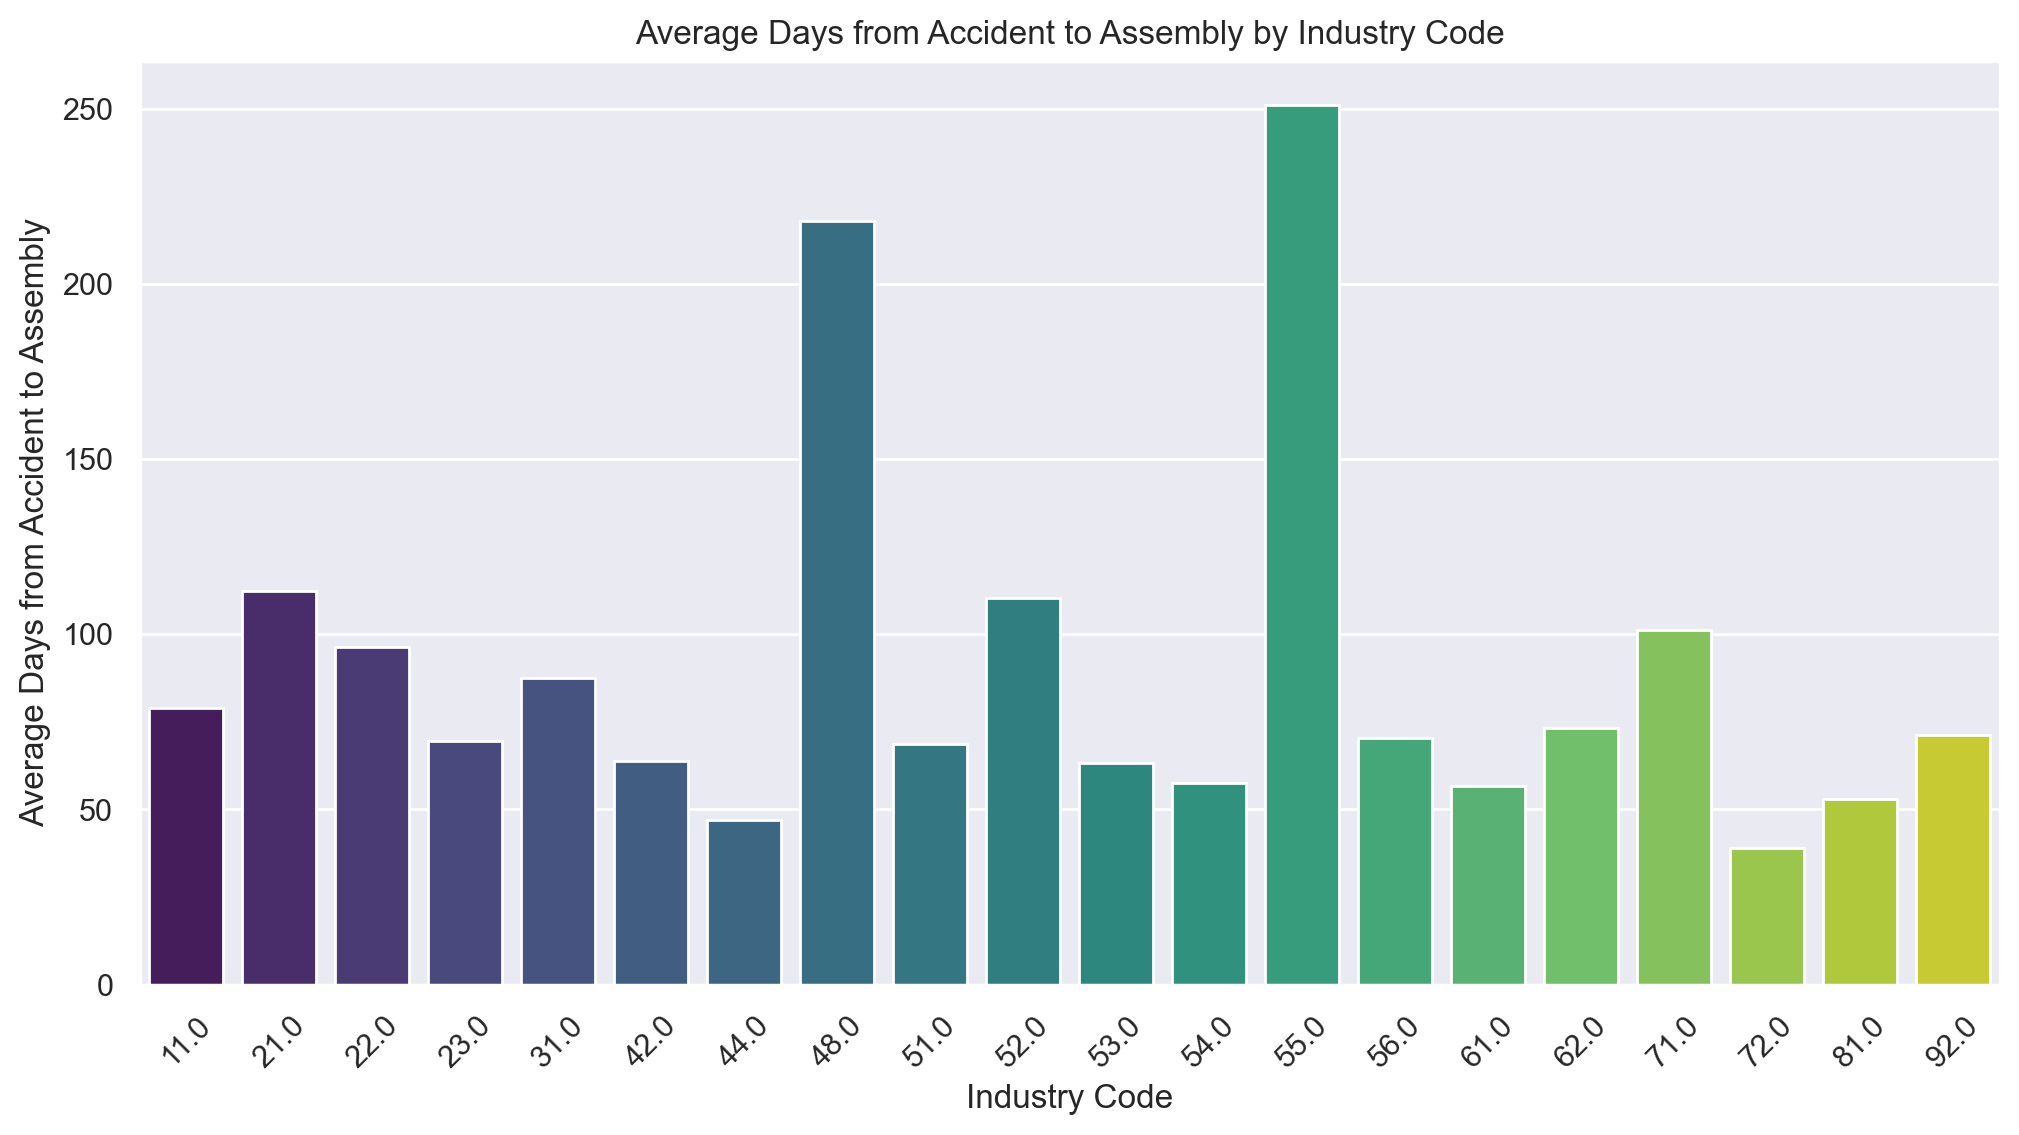

In [597]:
# Calculate mean days for each industry code
# Calculate mean days for each industry code without resetting the index
mean_days_by_industry = X_train.groupby('Industry Code')['Days from Accident to Assembly'].mean()

# Plot the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_days_by_industry.index, y=mean_days_by_industry.values, palette='viridis')

# Add labels and title
plt.xlabel('Industry Code')
plt.ylabel('Average Days from Accident to Assembly')
plt.title('Average Days from Accident to Assembly by Industry Code')
plt.xticks(rotation=45)
plt.show()


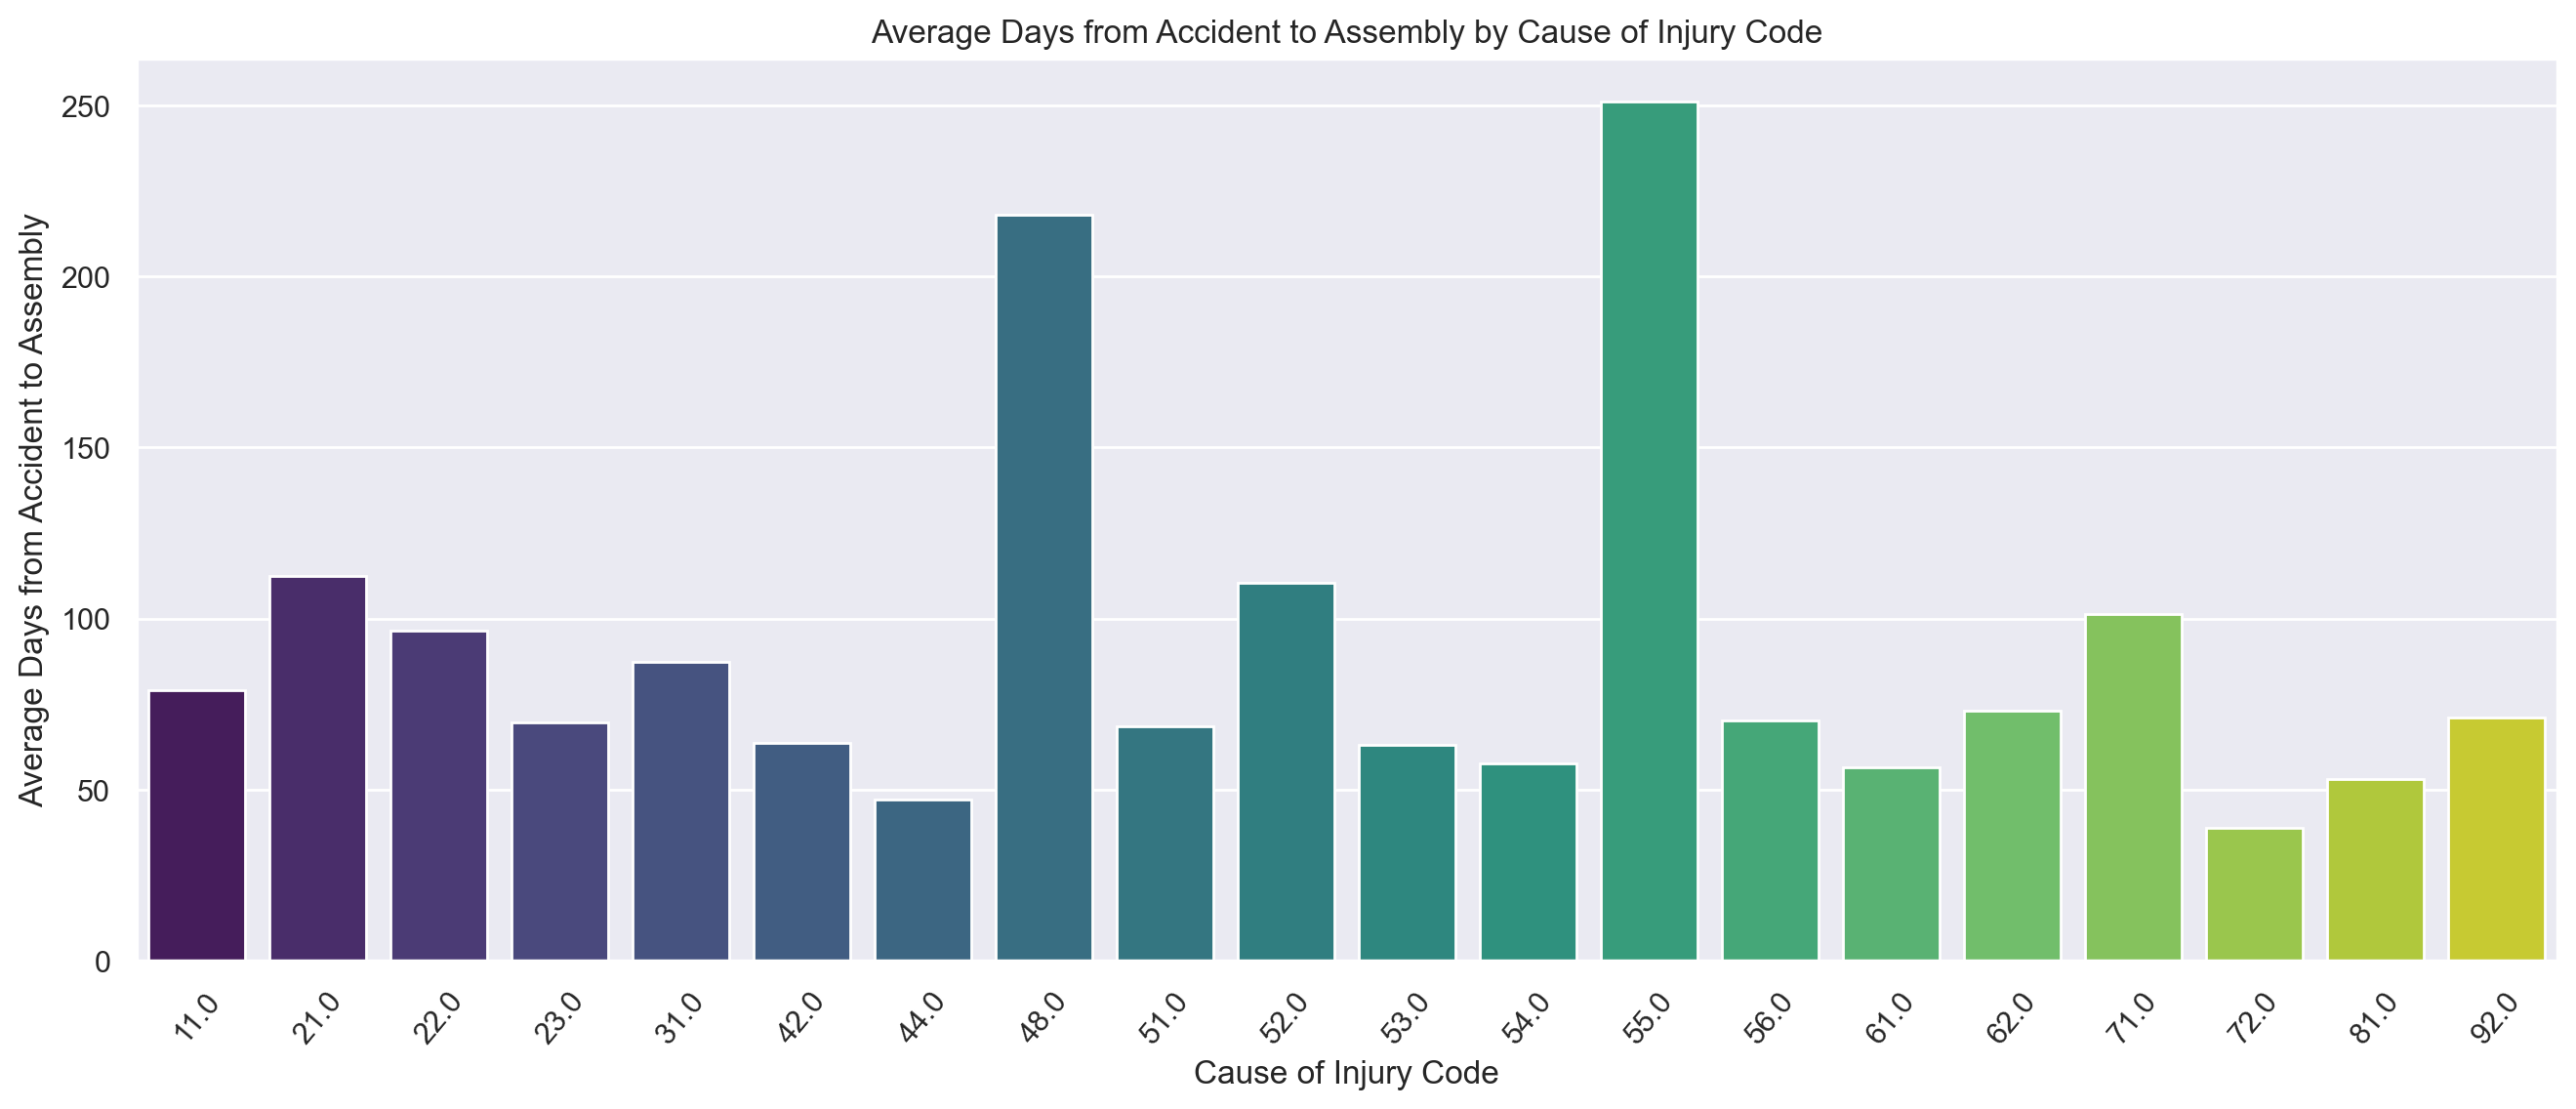

In [599]:
# Calculate mean days for each industry code
# Calculate mean days for each industry code without resetting the index
mean_days_by_injury = X_train.groupby('WCIO Cause of Injury Code')['Days from Accident to Assembly'].mean()

# Plot the bar plot
plt.figure(figsize=(16, 6))
sns.barplot(x=mean_days_by_industry.index, y=mean_days_by_industry.values, palette='viridis')

# Add labels and title
plt.xlabel('Cause of Injury Code')
plt.ylabel('Average Days from Accident to Assembly')
plt.title('Average Days from Accident to Assembly by Cause of Injury Code')
plt.xticks(rotation=50)
plt.show()

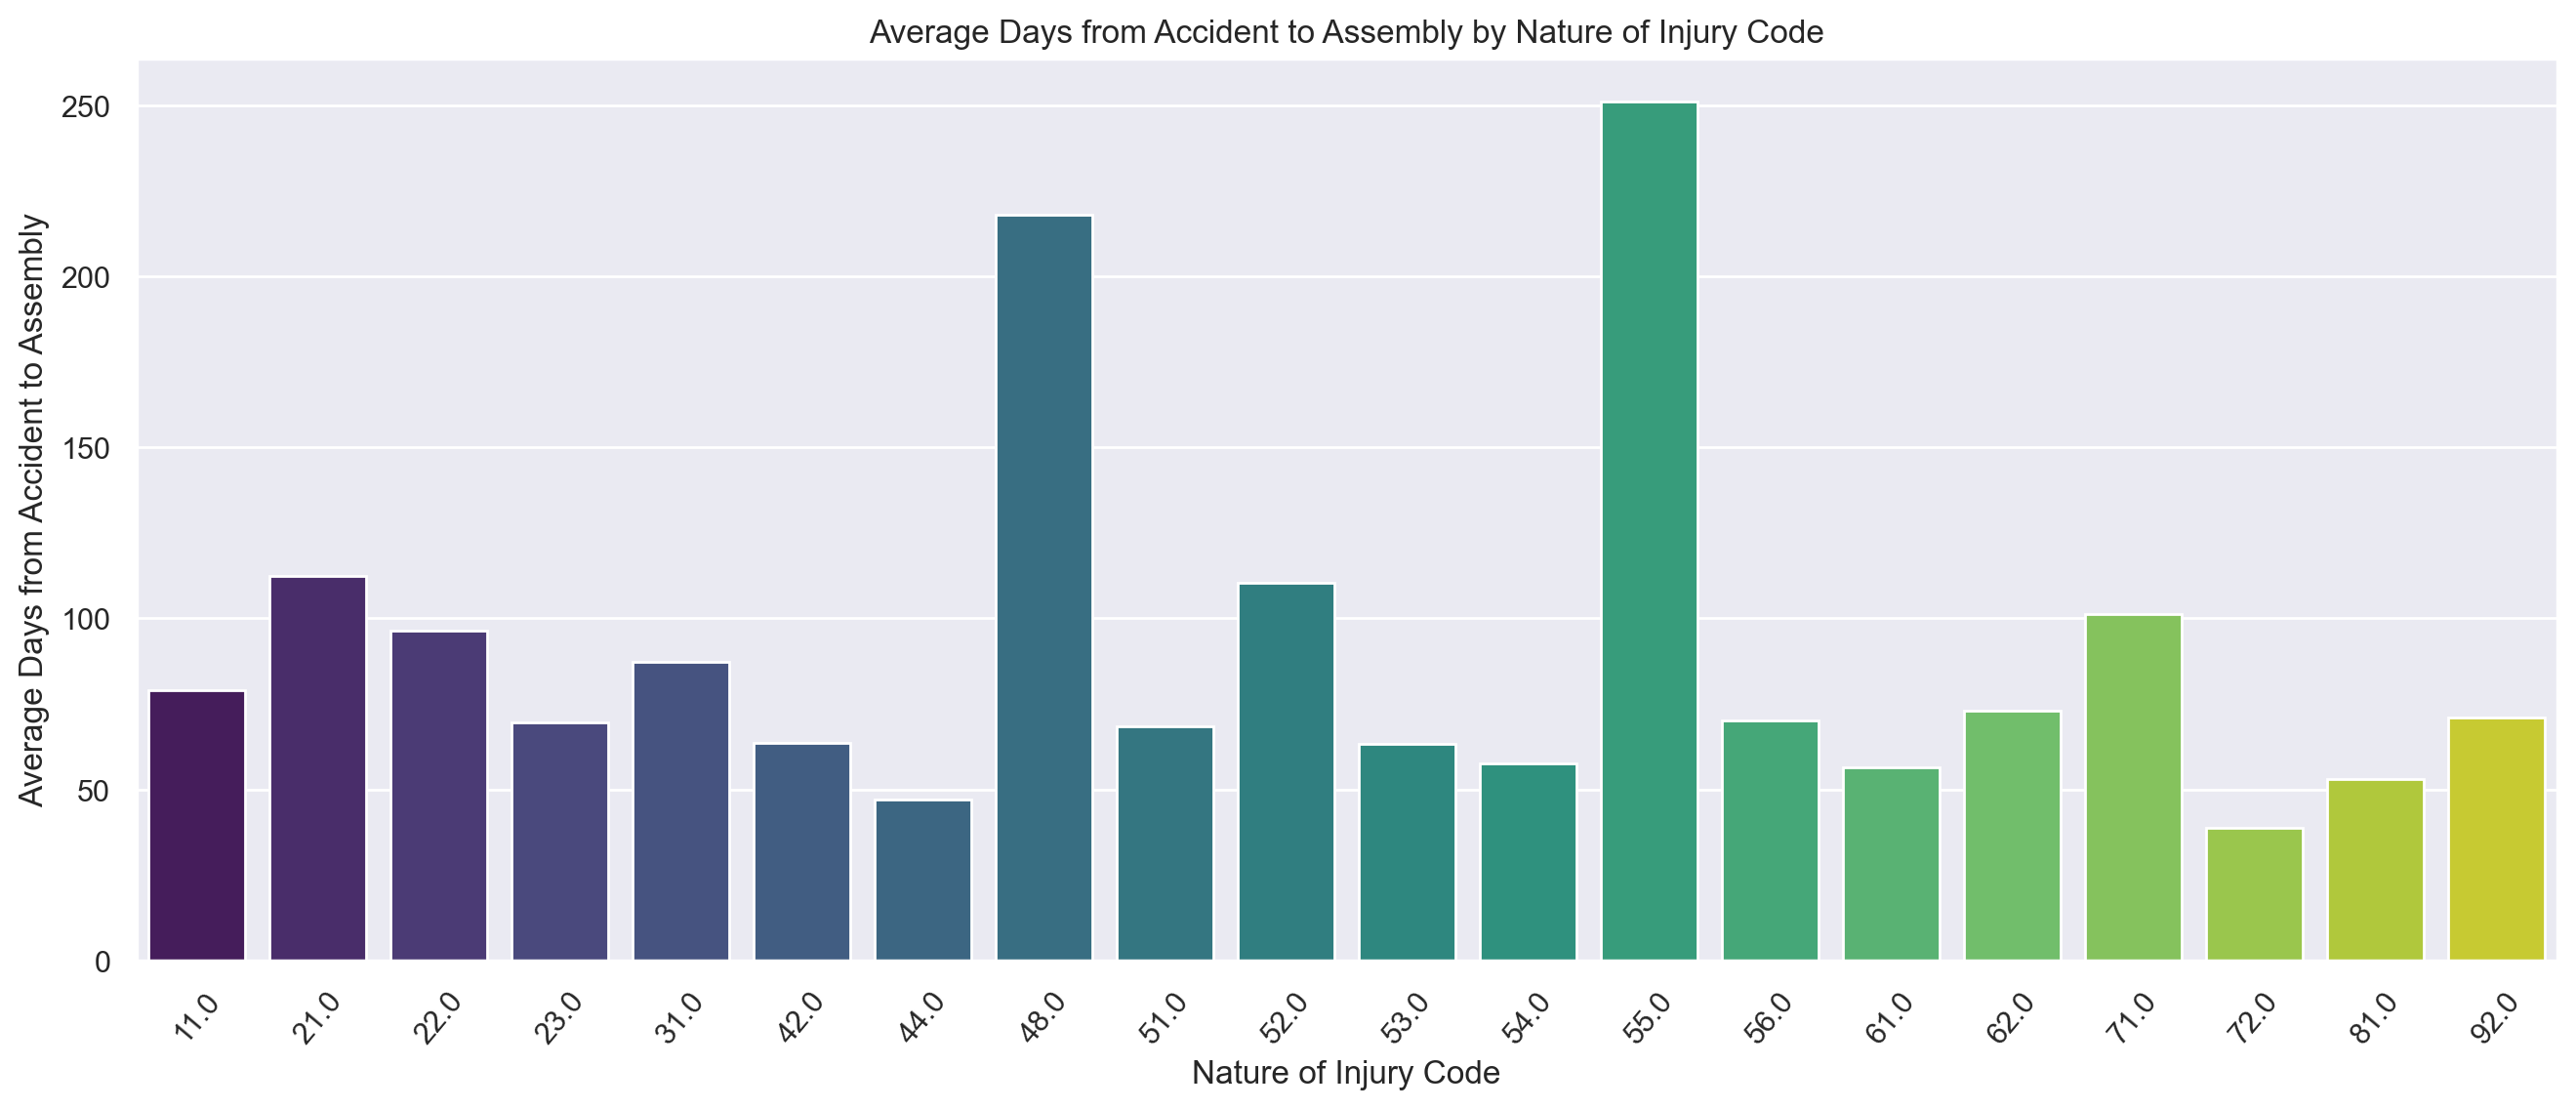

In [600]:
# Calculate mean days for each industry code
# Calculate mean days for each industry code without resetting the index
mean_days_by_injury = X_train.groupby('WCIO Nature of Injury Code')['Days from Accident to Assembly'].mean()

# Plot the bar plot
plt.figure(figsize=(16, 6))
sns.barplot(x=mean_days_by_industry.index, y=mean_days_by_industry.values, palette='viridis')

# Add labels and title
plt.xlabel('Nature of Injury Code')
plt.ylabel('Average Days from Accident to Assembly')
plt.title('Average Days from Accident to Assembly by Nature of Injury Code')
plt.xticks(rotation=50)
plt.show()

## 2.8 Check Data for Encoding

`Step 1` Confirm there are no missinng values, and that X and y have the same number of rows

In [606]:
y_train.shape

(401818,)

In [607]:
X_train.shape

(401818, 35)

In [609]:
y_val.shape

(172208,)

In [610]:
X_val.shape

(172208, 35)

In [611]:
X_test.isna().sum()

Accident Year                     0
Age at Injury                     0
Alternative Dispute Resolution    0
Assembly Year                     0
Attorney/Representative           0
Average Weekly Wage               0
Birth Year                        0
Carrier Name                      0
Carrier Type                      0
Claim Identifier                  0
County of Injury                  0
COVID-19 Indicator                0
District Name                     0
Gender                            0
IME-4 Count                       0
Industry Code                     0
Medical Fee Region                0
WCIO Cause of Injury Code         0
WCIO Nature of Injury Code        0
WCIO Part Of Body Code            0
Zip Code                          0
Number of Dependents              0
First Hearing                     0
C-3 Delivery                      0
C-2 Delivery                      0
Days from Accident to C-2         0
Days from Accident to Assembly    0
C-2 under Deadline          

In [612]:
X_train, y_train = X_train.align(y_train, axis=0, join='inner')

In [613]:
X_train.shape

(401818, 35)

In [614]:
y_train.shape

(401818,)

In [615]:
X_val, y_val = X_val.align(y_val, axis=0, join='inner')

In [616]:
X_val.shape

(172208, 35)

In [617]:
y_val.shape

(172208,)

`Step 2` **Drop features that will not be on test environment:**

In [619]:
X_train = X_train.drop(['WCB Decision','Agreement Reached'], axis=1, errors='ignore')
X_val = X_val.drop(['WCB Decision','Agreement Reached'], axis=1, errors='ignore')

In [620]:
X_train.shape

(401818, 33)

### 2.9 Save variables to import on following notebooks

In [622]:
with open('mode_stats.py', 'w') as f:
    f.write(inspect.getsource(mode_stats))

In [623]:
X_train.select_dtypes(include='object').nunique()

Carrier Name                  1969
Carrier Type                     5
County of Injury                62
District Name                    8
Industry Code                   20
Medical Fee Region               4
WCIO Cause of Injury Code       75
WCIO Nature of Injury Code      56
WCIO Part Of Body Code          55
Zip Code                      6992
C-2 under Deadline               3
C-3 under Deadline               4
dtype: int64

In [624]:
X_test.select_dtypes(include='object').nunique()

Carrier Name                  1598
Carrier Type                     5
County of Injury                62
District Name                    8
Industry Code                   20
Medical Fee Region               4
WCIO Cause of Injury Code       75
WCIO Nature of Injury Code      56
WCIO Part Of Body Code          52
Zip Code                      6175
C-2 under Deadline               3
C-3 under Deadline               4
dtype: int64

### 2.10 Export Notebook for following steps

In [626]:
X_train.to_csv('X_train.csv', index=True)
X_val.to_csv('X_val.csv', index=True)
X_test.to_csv('X_test.csv', index=True)

In [627]:
y_train.to_csv("y_train.csv", index=True)
y_val.to_csv("y_val.csv", index=True)